# Fundamentals of Data Science Presentation
# Project: Cleaning of the Census Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from missforest.missforest import MissForest
import sys
from scipy import stats
import missingno as mno
import warnings
warnings.filterwarnings("ignore")

In [2]:
#To load the file
my_df = pd.read_csv("./census4_wed.csv")

In [3]:
my_df

House Number             Street First Name     Surname Age  \
0                1     Jones Crossing     Victor  Richardson  61   
1                1     Jones Crossing     Duncan       Clark  62   
2                1     Jones Crossing       Sian        Page  21   
3                1     Jones Crossing      Kevin       Jones  44   
4                1     Jones Crossing      Derek  Stephenson  28   
...            ...                ...        ...         ...  ..   
8232             1  Oyster Obervatory   Benjamin     Andrews  24   
8233             1  Oyster Obervatory       Luke     Andrews  24   
8234             1  Oyster Obervatory     Marion     Andrews  22   
8235             1  Oyster Obervatory       Kyle     Andrews  22   
8236             1  Oyster Obervatory      Nigel     Andrews   2   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single    Male   
1                              NaN         Single    Male   
2                              NaN         Single  Female   
3                              NaN         Single    Male   
4                              NaN         Single    Male   
...                            ...            ...     ...   
8232                           Son         Single    Male   
8233                           Son       Divorced    Male   
8234                      Daughter         Single  Female   
8235                           Son         Single    Male   
8236                           Son            NaN    Male   

                 Occupation Infirmity   Religion  
0                    Lawyer       NaN  Christian  
1           Energy engineer       NaN  Christian  
2        University Student       NaN  Methodist  
3              Set designer       NaN  Methodist  
4           Psychotherapist       NaN     Muslim  
...                     ...       ...        ...  
8232  Clinical embryologist       NaN  Christian  
8233          IT consultant       NaN        NaN  
8234     University Student       NaN  Christian  
8235     University Student       NaN  Christian  
8236                  Child       NaN        NaN  

[8237 rows x 11 columns]

## Section I: Exploratory Data Cleaning and Analysis

In [4]:
my_df.info() # To get an overview report of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8237 non-null   int64 
 1   Street                         8237 non-null   object
 2   First Name                     8237 non-null   object
 3   Surname                        8237 non-null   object
 4   Age                            8237 non-null   object
 5   Relationship to Head of House  7610 non-null   object
 6   Marital Status                 6248 non-null   object
 7   Gender                         8237 non-null   object
 8   Occupation                     8237 non-null   object
 9   Infirmity                      74 non-null     object
 10  Religion                       3372 non-null   object
dtypes: int64(1), object(10)
memory usage: 708.0+ KB


#### The dataset is in pandas dataframe format. There are 11 columns and 8237 rows. The data in the House Number column is integer while that of the rest of the 10 columns presents as objects.

In [5]:
my_df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     627
Marital Status                   1989
Gender                              0
Occupation                          0
Infirmity                        8163
Religion                         4865
dtype: int64

#### From the above output, it can be seen that there are 627 missing values in the Relationship to Head of House colunn, 1,989 in Marital Status, 8163 in Infirmity, and 4,865 in the Religion column, which are of the NaN category. 

#### Prior to dealing with missing values, it will be good do a rigorous investigation of the missing values (Prabhakaran, no date)

### a. Matrix of Missing Values

<Axes: >

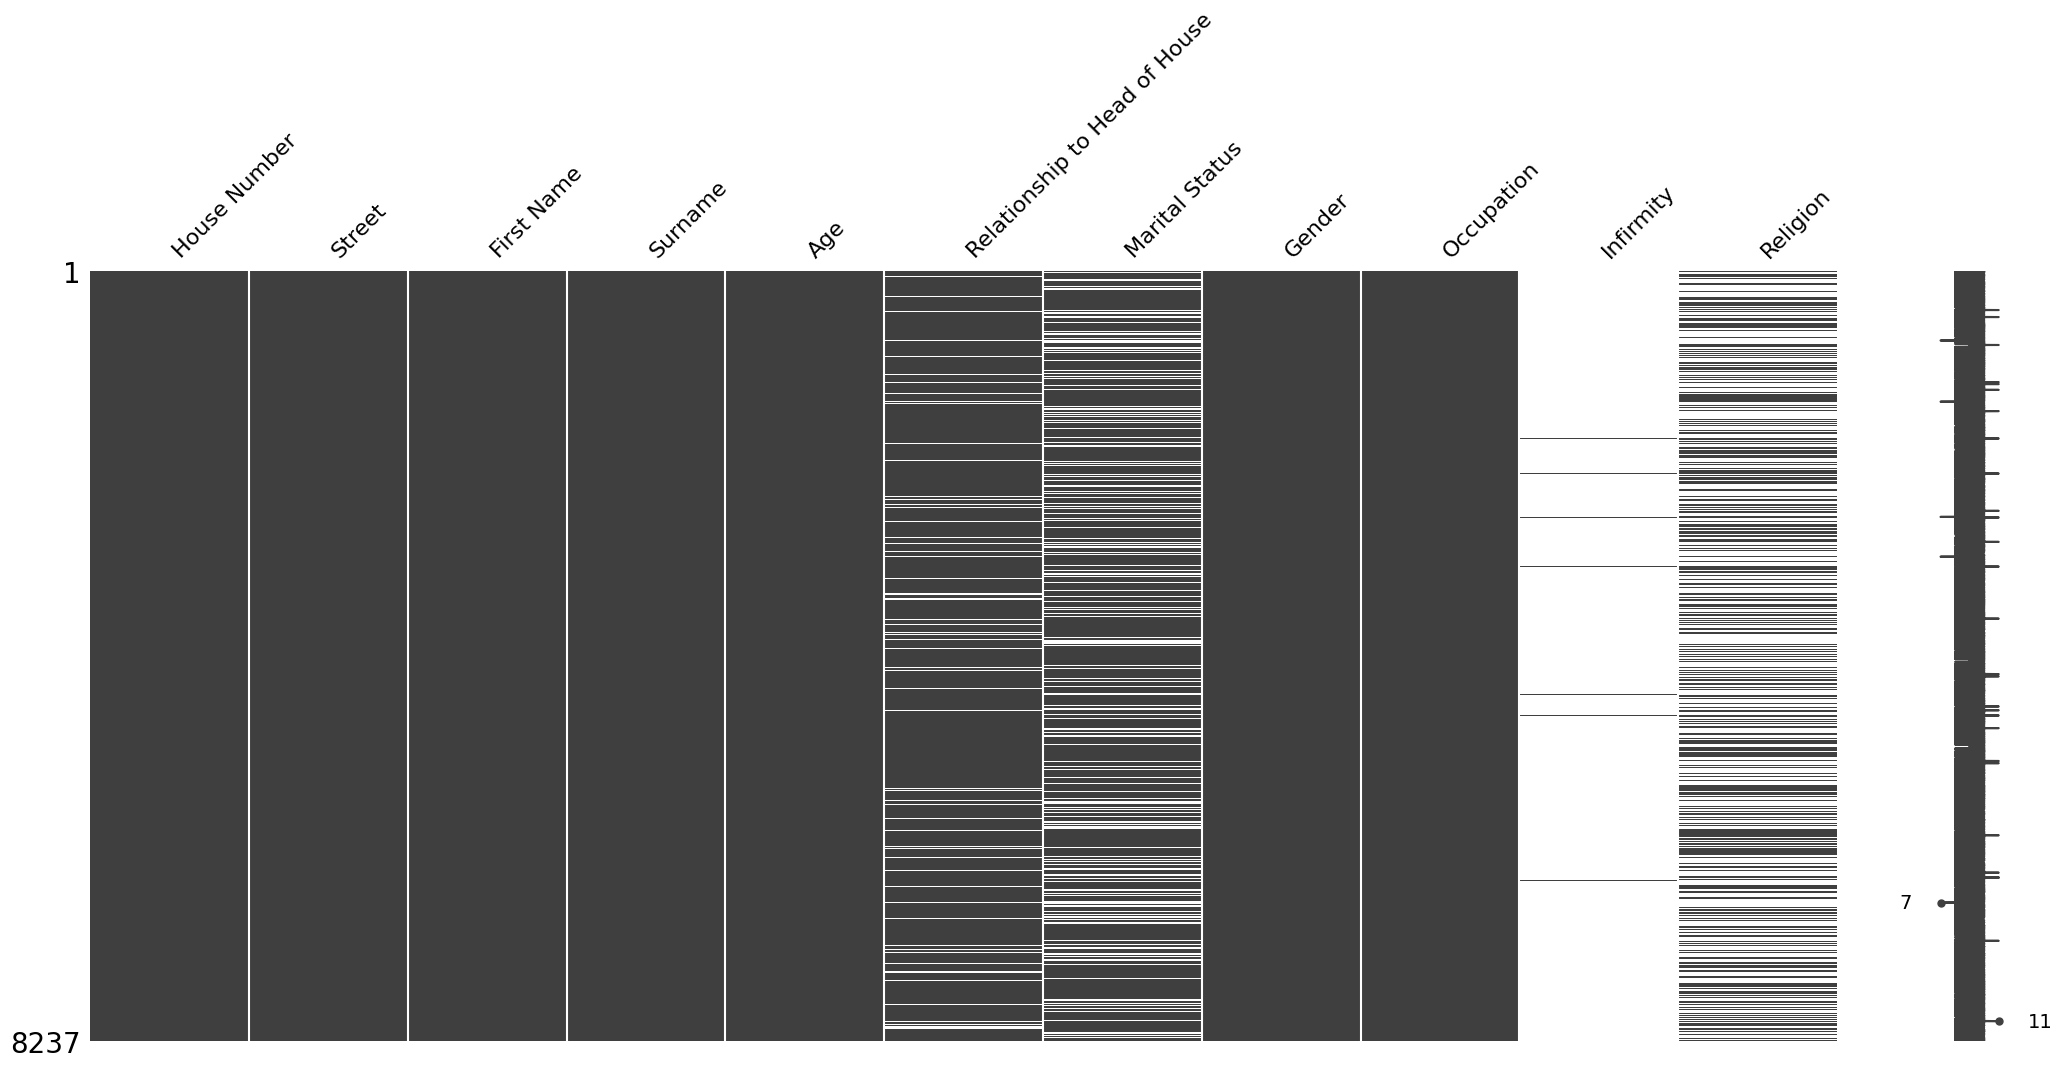

In [6]:
mno.matrix(my_df)

### b. Correlation of Missing Values

<Axes: >

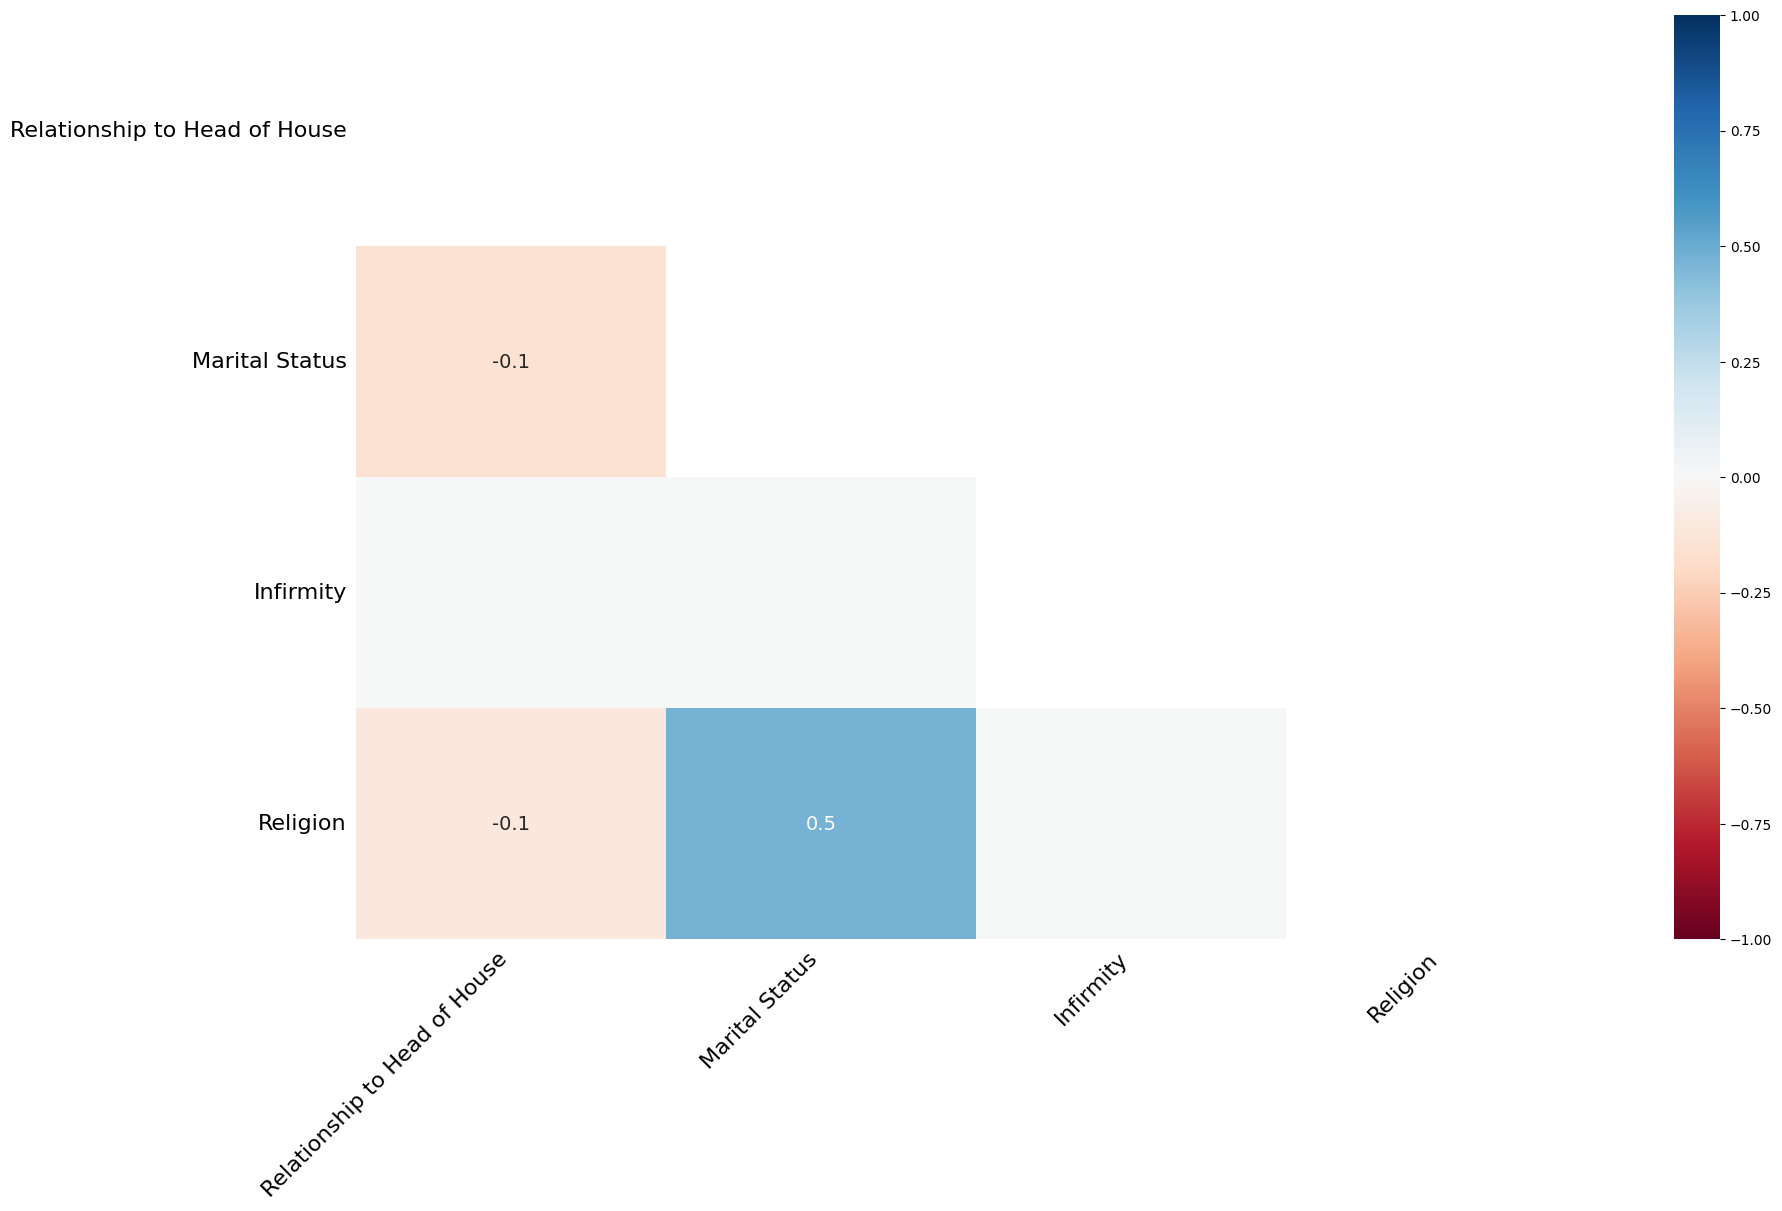

In [7]:
mno.heatmap(my_df)

#### Missing marital status values are moderately and positively correlated with religion missing values. Those in Relationship to Head of House are and Religion have weak negative correlation.

#### The below codes were applied to the 4 columns with missing values to find out the specific rows on which lie missing values

#### my_df[my_df["Relationship to Head of House"].isna()]
#### my_df[my_df["Marital Status"].isna()]
#### my_df[my_df["Infirmity"].isna()]
#### my_df[my_df["Religion"[.isna()]

#### In addition to the above list, it might be possible to investigate additional missing values using the .unique() function for each column so as to have a comprehensive list of missing values.

In [8]:
# The below code was used to check for inconsistency in the unique values of each column.

# my_df["House Number"].unique()
# my_df["Street"].unique()
# my_df["First Name"].unique() # " " missing value type
# my_df["Surname"].unique() # " " missing value type
# my_df["Age"].unique() # " " missing value
# my_df["Relationship to Head of House"].unique() # NaN, " " missing value types
# my_df["Marital Status"].unique() # NaN missing value types
# my_df["Gender"].unique() # " " missing value
# my_df["Occupation"].unique() # ... missing value
# my_df["Infirmity"].unique() # NaN, " " missing value
my_df["Religion"].unique() # NaN, " "

array(['Christian', 'Methodist', 'Muslim', nan, 'Catholic', 'Jewish',
       'Sikh', 'Private', 'Secular', 'Agnostic', 'Undecided', 'Baptist',
       'Hindu', ' ', 'Orthodoxy', 'Scientology', 'Pagan', 'Bahai'],
      dtype=object)

#### The .unique() code performed across all columns as seen above revealed that the First Name, Surname, Age, Relationship to Head of House, Gender, Occupation, Infirmity, and Religion columnns have at least one empty cell in addition to the NaNs.
#### The .isin() code was passed to investigate the spcific string to reveal their specific indexes

In [9]:
# my_df[my_df["First Name"].isin([" "])] # 1 missing value
# my_df[my_df["Surname"].isin([" "])] # 3 missing values
# my_df[my_df["Age"].isin([" "])] # 1 missing value
# my_df[my_df["Relationship to Head of House"].isin([" "])] # 2 missing values
# my_df[my_df["Gender"].isin([" "])] # 1 missing value
# my_df[my_df["Occupation"].isin([" "])] # 2 missing values
# my_df[my_df["Infirmity"].isin([" "])] # 11 missings values
# my_df[my_df["Religion"].isin([" "])] # 1 missing value

#### - The above investigation showed that there were empty string cells distributed as follows;
#### - Individual at index 5374 had the first name missing.
#### - 3 persons (at indexes 315, 3165, and 7128) had their surnames missing.
#### - No age record for the person at index 2107.
#### - Unknown relationship to the head of house for the persons at indexes 1967 and 7441.
#### - Missing gender status for individual at index 5968.
#### - Two individuals (at indexes 3482 and 3484) are with unknown occupations.
#### - The persons at indexes 1498, 2166, 2565, 3161, 3758, 4029, 4109, 4889, 5076, 6035, and 6919. 
#### - The person at index 5902 is with unknown religion.

#### Given that the reasons for the above missing data are unknown, I assumed that there were missing at random (Sainani, 2015) for the purpose of this assignment. I proceeded by replacing the empty string cells with NaN so as to have a comprehensive list of missing values considered Not a Number (NaN). 
#### Before continuing, I created a copy of the original file.

In [10]:
dfcopy = my_df.copy()
# dfcopy
# dfcopy.info()
# dfcopy.isnull().sum()
# dfcopy["Age"].unique()

## 1. Standardizing missing values

In [11]:
dfcopy = dfcopy.replace([" "], np.NaN)

In [12]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8237 non-null   int64 
 1   Street                         8237 non-null   object
 2   First Name                     8236 non-null   object
 3   Surname                        8234 non-null   object
 4   Age                            8236 non-null   object
 5   Relationship to Head of House  7608 non-null   object
 6   Marital Status                 6248 non-null   object
 7   Gender                         8236 non-null   object
 8   Occupation                     8235 non-null   object
 9   Infirmity                      63 non-null     object
 10  Religion                       3371 non-null   object
dtypes: int64(1), object(10)
memory usage: 708.0+ KB


In [13]:
dfcopy.isnull().sum().to_frame()

0
House Number                      0
Street                            0
First Name                        1
Surname                           3
Age                               1
Relationship to Head of House   629
Marital Status                 1989
Gender                            1
Occupation                        2
Infirmity                      8174
Religion                       4866

#### Based on the above updated culumns with missing data, I sort to plot the missing data for better visualization (Nayak, 2022)

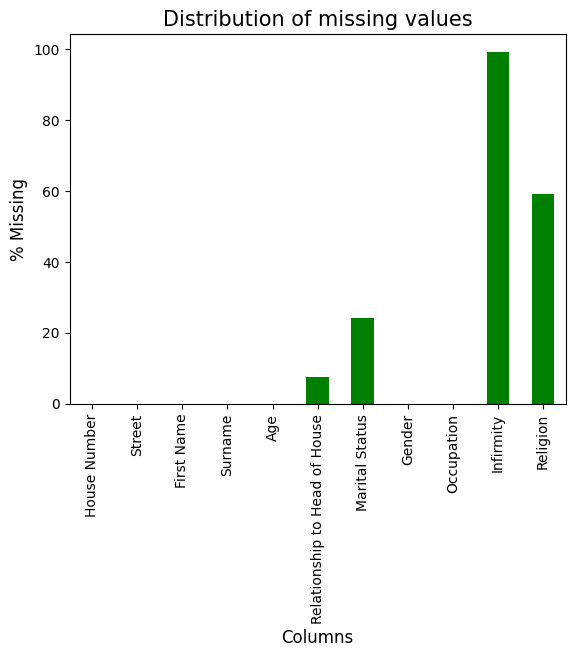

In [14]:
missing = dfcopy.isnull().sum()
col_count = len(dfcopy)
percent_missing = round((missing/col_count) * 100, 2)

def plot_null_values(dfcopy:pd.DataFrame, title:str, xlabel:str, ylabel:str):
    percent_missing.plot.bar(color = "g")
    
    plt.title(title, fontsize = 15, loc = "center")
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.show()

plot_null_values(dfcopy, "Distribution of missing values", "Columns", "% Missing")

## 2. Checking for Duplicate Records

In [15]:
duplicate = dfcopy[dfcopy.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

## 3. Investigating Columns with High-level Missing Data

In [16]:
percent_missing.to_frame()

0
House Number                    0.00
Street                          0.00
First Name                      0.01
Surname                         0.04
Age                             0.01
Relationship to Head of House   7.64
Marital Status                 24.15
Gender                          0.01
Occupation                      0.02
Infirmity                      99.24
Religion                       59.07

#### The Infirmity column has high-level missing data with 99.2%. I chose to maintin this column rather than drop it because it was esteemed that the imformation was importantant in the decisions regarding land use.

## 4. Replacement of Missing Values using MissForest

## 4.1 First Name

In [17]:
dfcopy[dfcopy["First Name"].isnull()]
dfcopy.at[5374, "First Name"] = "Unknown"
dfcopy[dfcopy["First Name"].isin(["Unknown"])]

House Number         Street First Name Surname Age  \
5374             3  Cinnamon Walk    Unknown  Ashton  49   

     Relationship to Head of House Marital Status Gender  \
5374                       Partner         Single   Male   

                Occupation Infirmity Religion  
5374  Field trials officer       NaN      NaN

## 4.2 Surname

In [18]:
#dfcopy[dfcopy.Surname.isnull()]
#dfcopy.loc[(dfcopy["House Number"] == 43) & (dfcopy["Street"] == "Windy Dale")]
dfcopy.at[315, "Surname"] = "Preston" # Replaced with that of head of family

In [19]:
#dfcopy.loc[(dfcopy["House Number"] == 4) & (dfcopy["Street"] == "Fletcher Spur")]
dfcopy.at[3165, "Surname"] = "Moore" # Replaced with husband's name

In [20]:
#dfcopy.loc[(dfcopy["House Number"] == 6) & (dfcopy["Street"] == "Hazel Ford")]
dfcopy.at[7128, "Surname"] = "Brown" # Replaced with surname of the siblings

In [21]:
dfcopy[dfcopy.Surname.isnull()]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

## 4.3 Age

#### The Age column has only a single empty string cell at index 2107. In order to determine the method of imputation, I started by investingating the age distribution among those whose relationship to Head of House was "Head" by using boolean indexing to call the ages of all heads of house (Cloud, 2023).

#### All values in the age column were converted to integer using pd.to_numeric() function (Cloud, 2022). This was found to work better than the .astype().astype() function proposed by Pinkins (Pinkins, 2023).

In [22]:
dfcopy["Age"] = pd.to_numeric(dfcopy["Age"], downcast = "integer")

#### A histogram with fitted KDensity curve was then plotted to determine the age distribution of the subgroup

Text(0.5, 1.0, 'Female Heads of House Distribution')

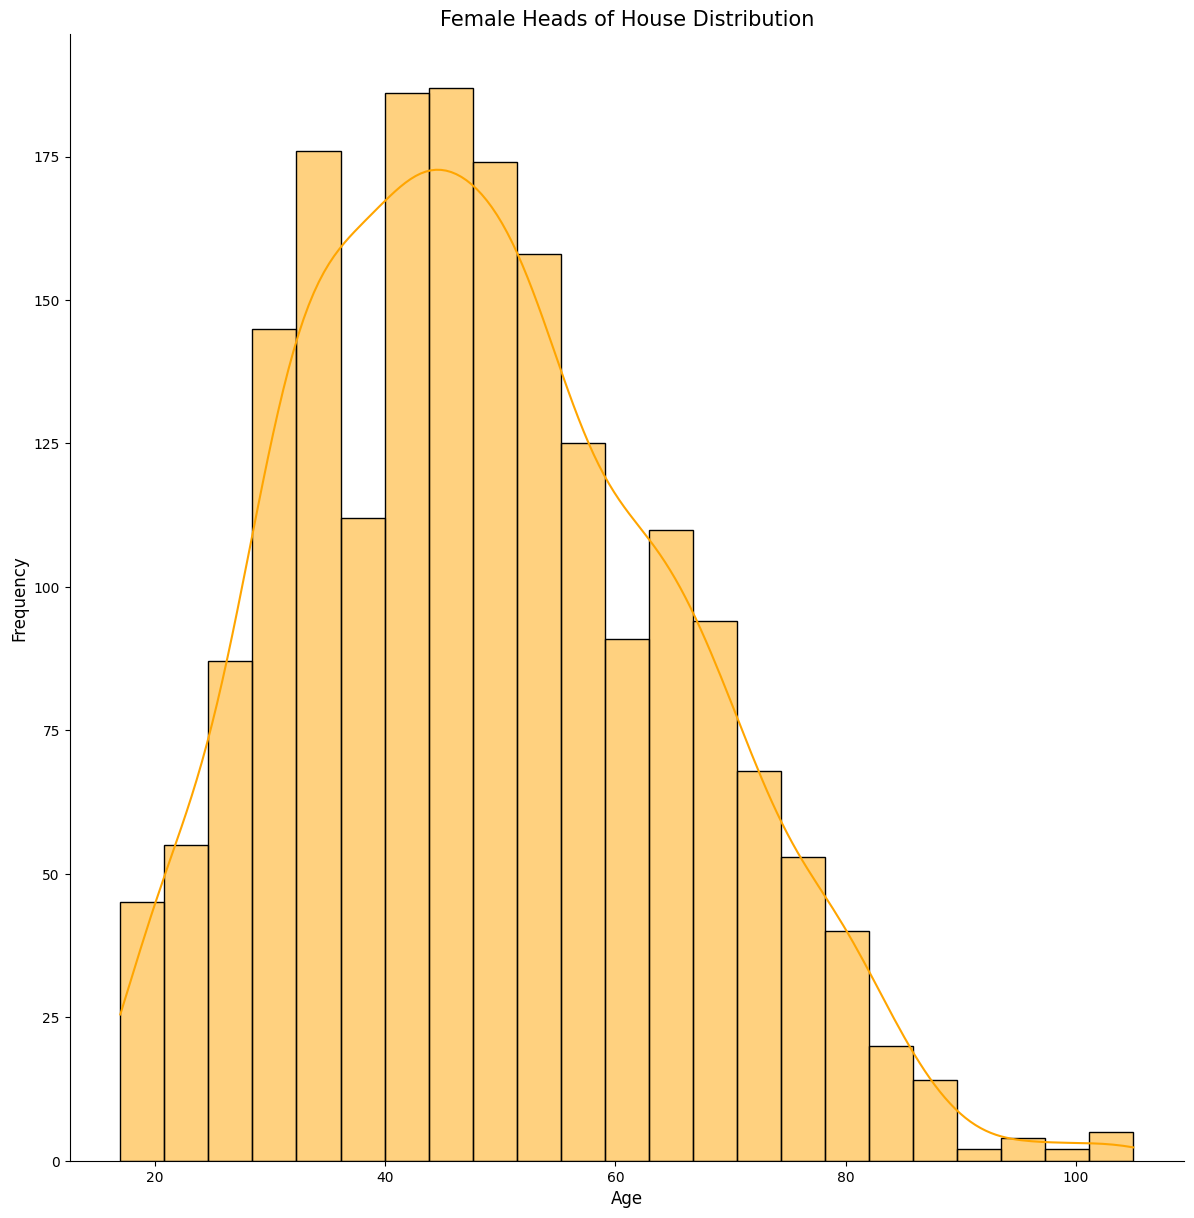

In [23]:
head_ages = dfcopy.loc[(dfcopy["Relationship to Head of House"] == "Head") & (dfcopy["Gender"] == "Female"), "Age"]

sns.displot(head_ages, height = 12, color = "orange", edgecolor = "black", kde=True)

plt.xlabel("Age", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.title("Female Heads of House Distribution", fontsize = 15)

#### Following the aove histogram, it was clear that the ages of Heads of House in the "Relationship to Head of House" column were not normally distributed. The median was then found to be a better measure of central tendency (Hopkins, 2018). 
#### The median age of heads of house was deployed to replace the single missing value in the Age column.

In [24]:
# To calculate the median;
head_ages.median()

47.0

#### Accoding to Saturn Cloud (Cloud, 2023), the below code was passed to replace the the missing valure with the median age of female heads of house.

In [25]:
#dfcopy[dfcopy.Age.isnull()]
dfcopy.at[2107, "Age"] = 47
dfcopy["Age"].unique()

array([ 61.        ,  62.        ,  21.        ,  44.        ,
        28.        ,  49.        ,  51.        ,  19.        ,
        17.        ,  36.        ,  38.        ,   6.        ,
         2.        ,  43.        ,  41.        ,  15.        ,
        42.        ,   5.        ,   3.        ,  73.        ,
        40.        ,  13.        ,  11.        ,   7.        ,
        64.        ,  39.        ,  34.        ,  48.        ,
        45.        ,  14.        ,  12.        ,  50.        ,
         9.        ,  58.        ,  16.        ,  10.        ,
        52.        ,  54.        ,  22.        ,  63.        ,
        35.        ,  26.        ,  30.        ,  33.        ,
         1.        ,  25.        ,  18.        ,  46.        ,
         8.        ,  37.        ,   4.        ,  29.        ,
        47.        ,  53.        ,  31.        ,  24.        ,
         0.        ,  55.        ,  27.        ,  69.        ,
        59.        ,  66.        ,  68.        ,  20.  

In [26]:
dfcopy["Age"]

0       61.0
1       62.0
2       21.0
3       44.0
4       28.0
        ... 
8232    24.0
8233    24.0
8234    22.0
8235    22.0
8236     2.0
Name: Age, Length: 8237, dtype: float64

#### All age values were then rounded down to the nearest integer. This is because precision with decimals was not necessary (Habibzadeh, 2015)

## 4.4 Marital Status

In [27]:
dfcopy["Marital Status"].mode()
dfcopy["Marital Status"].isnull().sum()
dfcopy[dfcopy["Marital Status"].isnull()]
dfcopy.loc[(dfcopy["Marital Status"].isnull()) & (dfcopy["Age"] < 18)]
dfcopy.loc[(dfcopy["Marital Status"] == "Married") & (dfcopy["Age"] < 18)]

House Number      Street First Name  Surname   Age  \
264            28  Windy Dale      Tracy  Vaughan  17.0   

    Relationship to Head of House Marital Status  Gender Occupation Infirmity  \
264                          Head        Married  Female    Student       NaN   

    Religion  
264      NaN

In [28]:
dfcopy.at[264, "Marital Status"] = "N/A"

In [29]:
dfcopy.loc[(dfcopy["Marital Status"] == "Married") & (dfcopy["Age"] < 18)]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [30]:
dfcopy[dfcopy["Marital Status"].isnull()]
dfcopy.loc[(dfcopy["Marital Status"].isnull()) & (dfcopy["Age"] < 18)]

House Number             Street First Name    Surname   Age  \
8                2     Jones Crossing       Leon    Stevens  17.0   
11               3     Jones Crossing       Jean  Wilkinson   6.0   
12               3     Jones Crossing    Natasha     Rhodes   2.0   
15               4     Jones Crossing     Amelia   Faulkner  17.0   
16               4     Jones Crossing    Michael   Faulkner  15.0   
...            ...                ...        ...        ...   ...   
8221             1      England Folly    Kenneth    Russell  11.0   
8222             1      England Folly    Carolyn    Russell  11.0   
8223             1      England Folly      Kerry     Brooks  10.0   
8229             1    Scepter Factory       Ruth      Frost   9.0   
8236             1  Oyster Obervatory      Nigel    Andrews   2.0   

     Relationship to Head of House Marital Status  Gender Occupation  \
8                              Son            NaN    Male    Student   
11                        Daughter            NaN  Female    Student   
12                        Daughter            NaN  Female      Child   
15                        Daughter            NaN  Female    Student   
16                             Son            NaN    Male    Student   
...                            ...            ...     ...        ...   
8221                           Son            NaN    Male    Student   
8222                      Daughter            NaN  Female    Student   
8223                      Daughter            NaN  Female    Student   
8229              Adopted Daughter            NaN  Female    Student   
8236                           Son            NaN    Male      Child   

     Infirmity Religion  
8          NaN      NaN  
11         NaN      NaN  
12         NaN      NaN  
15         NaN      NaN  
16         NaN      NaN  
...        ...      ...  
8221       NaN      NaN  
8222       NaN      NaN  
8223       NaN      NaN  
8229       NaN      NaN  
8236       NaN      NaN  

[1989 rows x 11 columns]

#### The above output shows that all null values where for those aged below 18. 
#### These were replaced with "N/A" because they are childre by law (UK government, 2024)

In [31]:
dfcopy["Marital Status"] = dfcopy["Marital Status"].fillna("N/A")
dfcopy.loc[(dfcopy["Marital Status"].isnull()) & (dfcopy["Age"] < 18)]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

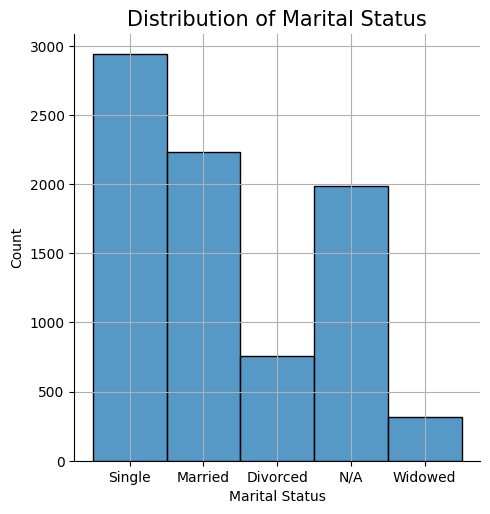

In [32]:
sns.displot(dfcopy, x = "Marital Status", multiple = "dodge") # (Waskom, 2024)
plt.title("Distribution of Marital Status", fontsize = 15)
plt.grid()

In [33]:
dfcopy.loc[(dfcopy["Marital Status"] == "Single") & (dfcopy["Relationship to Head of House"] == "Daughter")]
#dfcopy.loc[(dfcopy["Marital Status"] == "Married")]
#dfcopy.loc[(dfcopy["Marital Status"] == "Divorced")]
#dfcopy.loc[(dfcopy["Marital Status"] == "Divorced") & (dfcopy["Relationship to Head of House"] == "Head")]

House Number             Street First Name   Surname   Age  \
71              20     Jones Crossing      Kelly   Jenkins  22.0   
104             28     Jones Crossing     Brenda    Wright  37.0   
124             33     Jones Crossing       Tina   Bennett  26.0   
134              5         Ripon Cove      Lydia     Smith  38.0   
149             14         Ripon Cove   Kayleigh    Foster  34.0   
...            ...                ...        ...       ...   ...   
8186             1        Green Manor    Frances    Reeves  33.0   
8187             1        Green Manor      Emily    Reeves  29.0   
8205             1      Evans Mansion   Caroline  Robinson  19.0   
8228             1    Scepter Factory      Naomi     Frost  23.0   
8234             1  Oyster Obervatory     Marion   Andrews  22.0   

     Relationship to Head of House Marital Status  Gender  \
71                        Daughter         Single  Female   
104                       Daughter         Single  Female   
124                       Daughter         Single  Female   
134                       Daughter         Single  Female   
149                       Daughter         Single  Female   
...                            ...            ...     ...   
8186                      Daughter         Single  Female   
8187                      Daughter         Single  Female   
8205                      Daughter         Single  Female   
8228                      Daughter         Single  Female   
8234                      Daughter         Single  Female   

                          Occupation Infirmity   Religion  
71                University Student       NaN   Catholic  
104   Commercial art gallery manager       NaN        NaN  
124                       Air broker       NaN  Christian  
134             Brewing technologist       NaN  Christian  
149              Clinical biochemist       NaN        NaN  
...                              ...       ...        ...  
8186         Housing manager/officer       NaN        NaN  
8187                  Soil scientist       NaN        NaN  
8205              University Student       NaN  Christian  
8228          Leisure centre manager       NaN        NaN  
8234              University Student       NaN  Christian  

[341 rows x 11 columns]

## 4.5 Gender

In [34]:
dfcopy["Gender"].mode()

0    Female
Name: Gender, dtype: object

#### Although the mode of the Gender was Female, I chose to use the First Name column to determine the gender. Evidence suggest that those that go by the first name Craig are males in Wales, Scotland, Ireland (Wikipedia, 2024) (Hanks et al., 2006).

#### The below code was passed to locate the index of the missing value in the Gender column.

In [35]:
dfcopy[dfcopy.Gender.isnull()]

House Number        Street First Name Surname   Age  \
5968            26  Murray Coves      Craig    Reed  56.0   

     Relationship to Head of House Marital Status Gender        Occupation  \
5968                       Partner         Single    NaN  Paediatric nurse   

     Infirmity Religion  
5968       NaN      NaN

In [36]:
dfcopy.at[5968, "Gender"] = "Male"
dfcopy.loc[(dfcopy["House Number"] == 26) & (dfcopy["Street"] == "Murray Coves")] #To verify task is effected

House Number        Street First Name  Surname   Age  \
5967            26  Murray Coves     Rachel  Johnson  49.0   
5968            26  Murray Coves      Craig     Reed  56.0   
5969            26  Murray Coves   Nicholas  Johnson   8.0   
5970            26  Murray Coves      Wendy  Johnson   5.0   
5971            26  Murray Coves    William  Johnson   2.0   

     Relationship to Head of House Marital Status  Gender  \
5967                          Head         Single  Female   
5968                       Partner         Single    Male   
5969                           Son            N/A    Male   
5970                      Daughter            N/A  Female   
5971                           Son            N/A    Male   

                  Occupation Infirmity   Religion  
5967  Audiological scientist       NaN  Methodist  
5968        Paediatric nurse       NaN        NaN  
5969                 Student       NaN        NaN  
5970                 Student       NaN        NaN  
5971                   Child       NaN        NaN

In [37]:
dfcopy[dfcopy["Gender"].isnull()]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

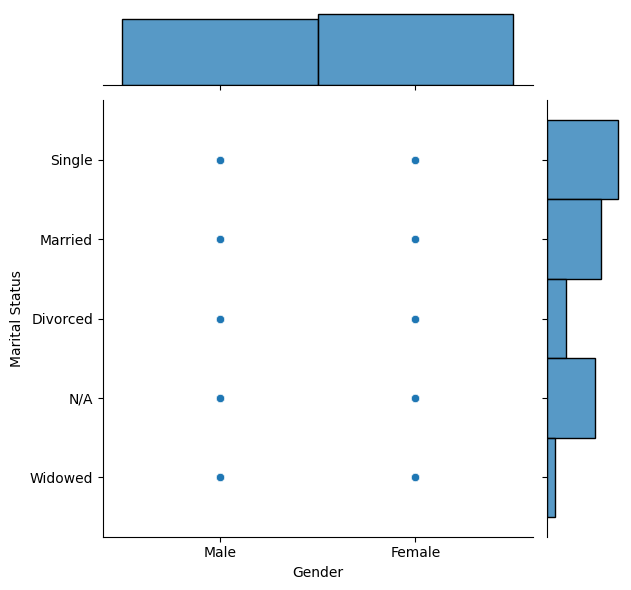

In [38]:
ax = sns.jointplot(data=dfcopy, x="Gender", y="Marital Status")

plt.show()

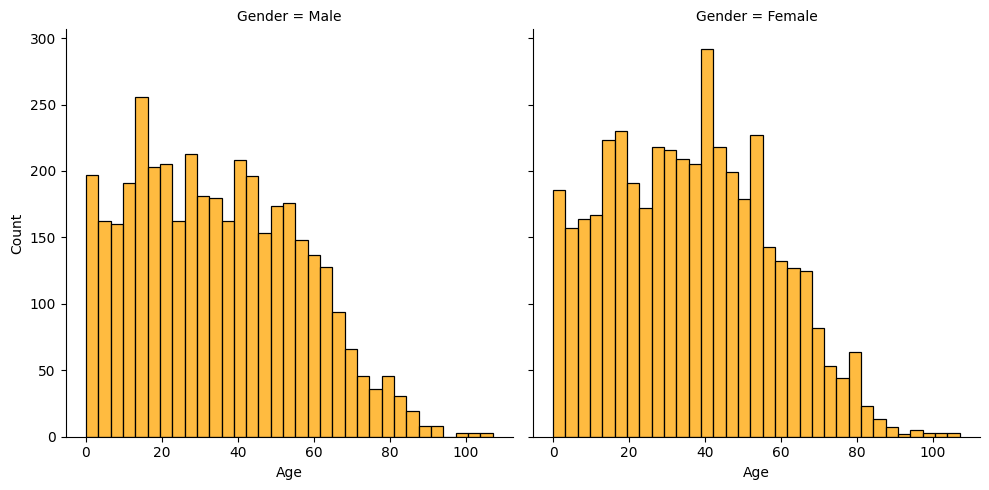

In [39]:
sns.displot(dfcopy, x="Age", col="Gender", color = "orange")

In [40]:
females = dfcopy.loc[(dfcopy["Gender"] == "Female")]
len(females)

4282

In [41]:
dfcopy.loc[(dfcopy["Gender"] == "Female"), "Age"].median()

36.0

In [42]:
dfcopy.loc[(dfcopy["Gender"] == "Male"), "Age"].median()

33.0

In [43]:
dfcopy.Age.median()

35.0

### 4.6 Occupation

#### There were 2 missing values in this column as seen below

In [44]:
dfcopy[dfcopy.Occupation.isnull()]

House Number            Street First Name Surname   Age  \
3482             1  Stephens Corners     Olivia    Ball  15.0   
3484             2  Stephens Corners  Geraldine    Wood   6.0   

     Relationship to Head of House Marital Status  Gender Occupation  \
3482                 Granddaughter            N/A  Female        NaN   
3484                      Daughter            N/A  Female        NaN   

     Infirmity Religion  
3482       NaN      NaN  
3484       NaN      NaN

In [45]:
dfcopy[dfcopy["Occupation"].isin(["Student", "University Student"])]

House Number             Street First Name    Surname   Age  \
2                1     Jones Crossing       Sian       Page  21.0   
7                2     Jones Crossing       Adam    Stevens  19.0   
8                2     Jones Crossing       Leon    Stevens  17.0   
11               3     Jones Crossing       Jean  Wilkinson   6.0   
15               4     Jones Crossing     Amelia   Faulkner  17.0   
...            ...                ...        ...        ...   ...   
8222             1      England Folly    Carolyn    Russell  11.0   
8223             1      England Folly      Kerry     Brooks  10.0   
8229             1    Scepter Factory       Ruth      Frost   9.0   
8234             1  Oyster Obervatory     Marion    Andrews  22.0   
8235             1  Oyster Obervatory       Kyle    Andrews  22.0   

     Relationship to Head of House Marital Status  Gender          Occupation  \
2                              NaN         Single  Female  University Student   
7                              Son       Divorced    Male  University Student   
8                              Son            N/A    Male             Student   
11                        Daughter            N/A  Female             Student   
15                        Daughter            N/A  Female             Student   
...                            ...            ...     ...                 ...   
8222                      Daughter            N/A  Female             Student   
8223                      Daughter            N/A  Female             Student   
8229              Adopted Daughter            N/A  Female             Student   
8234                      Daughter         Single  Female  University Student   
8235                           Son         Single    Male  University Student   

     Infirmity   Religion  
2          NaN  Methodist  
7          NaN  Christian  
8          NaN        NaN  
11         NaN        NaN  
15         NaN        NaN  
...        ...        ...  
8222       NaN        NaN  
8223       NaN        NaN  
8229       NaN        NaN  
8234       NaN  Christian  
8235       NaN  Christian  

[2146 rows x 11 columns]

In [46]:
dfcopy.loc[(dfcopy["House Number"] == 1) & (dfcopy["Street"] == "Stephens Corners")]

House Number            Street First Name Surname   Age  \
3478             1  Stephens Corners       Hugh  Davies  75.0   
3479             1  Stephens Corners     Yvonne  Davies  72.0   
3480             1  Stephens Corners      Bryan  Davies  18.0   
3481             1  Stephens Corners      Sarah    Ball  16.0   
3482             1  Stephens Corners     Olivia    Ball  15.0   

     Relationship to Head of House Marital Status  Gender  \
3478                          Head        Married    Male   
3479                          Wife        Married  Female   
3480                      Grandson       Divorced    Male   
3481                 Granddaughter            N/A  Female   
3482                 Granddaughter            N/A  Female   

                                         Occupation Infirmity   Religion  
3478                             Retired Contractor       NaN  Christian  
3479  Retired Engineer, control and instrumentation       NaN  Christian  
3480                                        Student       NaN  Christian  
3481                                        Student       NaN        NaN  
3482                                            NaN       NaN        NaN

In [47]:
dfcopy.at[3482, "Occupation"] = "Student" # Based on occupation of siblings

In [48]:
dfcopy.loc[(dfcopy["House Number"] == 2) & (dfcopy["Street"] == "Stephens Corners")]

House Number            Street First Name Surname   Age  \
3483             2  Stephens Corners       Jean    Wood  43.0   
3484             2  Stephens Corners  Geraldine    Wood   6.0   
3485             2  Stephens Corners    Barbara    Wood   4.0   

     Relationship to Head of House Marital Status  Gender  \
3483                          Head         Single  Female   
3484                      Daughter            N/A  Female   
3485                      Daughter            N/A  Female   

                 Occupation Infirmity Religion  
3483  Clinical psychologist       NaN      NaN  
3484                    NaN       NaN      NaN  
3485                  Child       NaN      NaN

In [49]:
dfcopy.Occupation.mode()
dfcopy.at[3484, "Occupation"] = "Student" # Based on the mode and secondly based on the legal school age (Department of Education, 2023)

In [50]:
dfcopy[dfcopy["Occupation"].isnull()]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [51]:
dfcopy.head()

House Number          Street First Name     Surname   Age  \
0             1  Jones Crossing     Victor  Richardson  61.0   
1             1  Jones Crossing     Duncan       Clark  62.0   
2             1  Jones Crossing       Sian        Page  21.0   
3             1  Jones Crossing      Kevin       Jones  44.0   
4             1  Jones Crossing      Derek  Stephenson  28.0   

  Relationship to Head of House Marital Status  Gender          Occupation  \
0                          Head         Single    Male              Lawyer   
1                           NaN         Single    Male     Energy engineer   
2                           NaN         Single  Female  University Student   
3                           NaN         Single    Male        Set designer   
4                           NaN         Single    Male     Psychotherapist   

  Infirmity   Religion  
0       NaN  Christian  
1       NaN  Christian  
2       NaN  Methodist  
3       NaN  Methodist  
4       NaN     Muslim

## 4.7 Relationship to Head of House, Infirmity and Religion

#### Relation to head of head of house had 629 missing, 8174 for Infirmity, and 4866 for Relion. The MissForest imputation method was used to impute missing values in these in the most effective way.

### Random Forest Imputation (MissForest) (Dash, 2022)

### 4.7.1 Define categorical columns list

In [52]:
nom_col = list(dfcopy.select_dtypes(include = ["object", "category"]).columns)
mycol = dfcopy[dfcopy.select_dtypes("object").columns]
col_indices = [dfcopy.columns.get_loc(c) for c in mycol] # To locate the indices of nominal columns

### 4.7.2 Trasnform categorical values to numeric

In [53]:
# To transform the above categorical values to numeric
from sklearn import preprocessing
col_le = {}
dfcopy_trans = dfcopy.copy()
for col in nom_col:
    le = preprocessing.LabelEncoder()
    le.fit(dfcopy[col])
    dfcopy_trans[col] = le.transform(dfcopy[col])
    col_le[col] = le

### 4.7.3 Reintroduce the null values

In [54]:
# In order reintroduce the NaN values;
for col in nom_col:
    my_values = []
    for i in range(len(dfcopy)):
        if pd.isna(dfcopy.loc[i][col]):
            my_values.append(np.nan)
        else:
            my_values.append(dfcopy_trans.loc[i][col])
    dfcopy_trans[col] = my_values

#### 4.7.4 Run the MissForest algorithm

In [55]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import missingpy
from missingpy import MissForest

imputer = MissForest(max_features=None)

cols = dfcopy.columns
dfcopy = pd.DataFrame(imputer.fit_transform(dfcopy_trans, cat_vars=col_indices))
dfcopy.columns = cols

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [56]:
dfcopy.head()

House Number  Street  First Name  Surname   Age  \
0           1.0    49.0       357.0    507.0  61.0   
1           1.0    49.0        99.0    121.0  62.0   
2           1.0    49.0       329.0    444.0  21.0   
3           1.0    49.0       211.0    318.0  44.0   
4           1.0    49.0        91.0    565.0  28.0   

   Relationship to Head of House  Marital Status  Gender  Occupation  \
0                            8.0             3.0     1.0       339.0   
1                           13.0             3.0     1.0       194.0   
2                            4.0             3.0     0.0      1004.0   
3                            8.0             3.0     1.0       919.0   
4                           15.0             3.0     1.0       481.0   

   Infirmity  Religion  
0        4.0       4.0  
1        5.0       4.0  
2        4.0       7.0  
3        4.0       7.0  
4        4.0       8.0

#### For exploratory purposes, I will create a copy of the above numeric sample of the dataframe and keep for later

In [57]:
mydf = dfcopy.copy()

### 4.7.5 Reinstate the data type of categorical columns to strings

In [58]:
for col in col_le:
    le = col_le[col]
    dfcopy[col] = le.inverse_transform(dfcopy[col].astype(int))

In [59]:
dfcopy.head(10)

House Number          Street First Name     Surname   Age  \
0           1.0  Jones Crossing     Victor  Richardson  61.0   
1           1.0  Jones Crossing     Duncan       Clark  62.0   
2           1.0  Jones Crossing       Sian        Page  21.0   
3           1.0  Jones Crossing      Kevin       Jones  44.0   
4           1.0  Jones Crossing      Derek  Stephenson  28.0   
5           2.0  Jones Crossing      Wendy     Stevens  49.0   
6           2.0  Jones Crossing   Benjamin     Stevens  51.0   
7           2.0  Jones Crossing       Adam     Stevens  19.0   
8           2.0  Jones Crossing       Leon     Stevens  17.0   
9           3.0  Jones Crossing      Megan   Wilkinson  36.0   

  Relationship to Head of House Marital Status  Gender            Occupation  \
0                          Head         Single    Male                Lawyer   
1                       Partner         Single    Male       Energy engineer   
2                      Daughter         Single  Female    University Student   
3                          Head         Single    Male          Set designer   
4                           Son         Single    Male       Psychotherapist   
5                          Head        Married  Female   Administrator, arts   
6                       Husband        Married    Male  Engineer, production   
7                           Son       Divorced    Male    University Student   
8                           Son            N/A    Male               Student   
9                          Head        Married  Female          Tour manager   

             Infirmity   Religion  
0  Physical Disability  Christian  
1    Unknown Infection  Christian  
2  Physical Disability  Methodist  
3  Physical Disability  Methodist  
4  Physical Disability     Muslim  
5  Physical Disability  Christian  
6  Physical Disability  Christian  
7                Blind  Christian  
8                 Deaf  Christian  
9  Physical Disability     Muslim

In [60]:
dfcopy["Relationship to Head of House"].value_counts().to_frame()

count
Relationship to Head of House       
Head                            3162
Son                             1539
Daughter                        1445
Husband                          823
Lodger                           334
Wife                             293
Partner                          253
Grandson                          92
Granddaughter                     85
Cousin                            48
Sibling                           41
Visitor                           33
Step-Son                          17
Adopted Son                       15
Adopted Daughter                  15
Nephew                            14
Neice                             13
Step-Daughter                     11
Adopted Granddaughter              3
Daughter-in-law                    1

In [61]:
head = dfcopy.loc[(dfcopy["Relationship to Head of House"] == "Head")]
head

House Number             Street First Name     Surname   Age  \
0              1.0     Jones Crossing     Victor  Richardson  61.0   
3              1.0     Jones Crossing      Kevin       Jones  44.0   
5              2.0     Jones Crossing      Wendy     Stevens  49.0   
9              3.0     Jones Crossing      Megan   Wilkinson  36.0   
13             4.0     Jones Crossing     Darren    Faulkner  43.0   
...            ...                ...        ...         ...   ...   
8202           1.0      Evans Mansion      Julie    Robinson  67.0   
8207           1.0     Williams Folly      Jemma       White  32.0   
8219           1.0      England Folly    Suzanne     Russell  45.0   
8224           1.0    Scepter Factory   Jennifer       Frost  60.0   
8230           1.0  Oyster Obervatory      Sally     Andrews  55.0   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single    Male   
3                             Head         Single    Male   
5                             Head        Married  Female   
9                             Head        Married  Female   
13                            Head        Married    Male   
...                            ...            ...     ...   
8202                          Head         Single  Female   
8207                          Head       Divorced  Female   
8219                          Head        Married  Female   
8224                          Head        Married  Female   
8230                          Head         Single  Female   

                          Occupation            Infirmity   Religion  
0                             Lawyer  Physical Disability  Christian  
3                       Set designer  Physical Disability  Methodist  
5                Administrator, arts  Physical Disability  Christian  
9                       Tour manager  Physical Disability     Muslim  
13                Furniture designer  Physical Disability  Christian  
...                              ...                  ...        ...  
8202               Quantity surveyor  Physical Disability  Christian  
8207     Health and safety inspector  Physical Disability  Christian  
8219                     Firefighter  Physical Disability  Methodist  
8224           Merchant navy officer  Physical Disability  Christian  
8230  Dance movement psychotherapist  Physical Disability  Christian  

[3162 rows x 11 columns]

In [62]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   8237 non-null   float64
 1   Street                         8237 non-null   object 
 2   First Name                     8237 non-null   object 
 3   Surname                        8237 non-null   object 
 4   Age                            8237 non-null   float64
 5   Relationship to Head of House  8237 non-null   object 
 6   Marital Status                 8237 non-null   object 
 7   Gender                         8237 non-null   object 
 8   Occupation                     8237 non-null   object 
 9   Infirmity                      8237 non-null   object 
 10  Religion                       8237 non-null   object 
dtypes: float64(2), object(9)
memory usage: 708.0+ KB


### 4.7.6 Control for data type in the House Number and Age Columns

#### House Number

In [63]:
dfcopy["House Number"] = dfcopy["House Number"].astype(int)
dfcopy.head()

House Number          Street First Name     Surname   Age  \
0             1  Jones Crossing     Victor  Richardson  61.0   
1             1  Jones Crossing     Duncan       Clark  62.0   
2             1  Jones Crossing       Sian        Page  21.0   
3             1  Jones Crossing      Kevin       Jones  44.0   
4             1  Jones Crossing      Derek  Stephenson  28.0   

  Relationship to Head of House Marital Status  Gender          Occupation  \
0                          Head         Single    Male              Lawyer   
1                       Partner         Single    Male     Energy engineer   
2                      Daughter         Single  Female  University Student   
3                          Head         Single    Male        Set designer   
4                           Son         Single    Male     Psychotherapist   

             Infirmity   Religion  
0  Physical Disability  Christian  
1    Unknown Infection  Christian  
2  Physical Disability  Methodist  
3  Physical Disability  Methodist  
4  Physical Disability     Muslim

#### Age

In [64]:
dfcopy["Age"] = pd.to_numeric(dfcopy["Age"], downcast = "integer")
dfcopy["Age"] = np.floor(dfcopy["Age"])

In [65]:
dfcopy["Age"] = dfcopy["Age"].astype(int)
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8237 non-null   int32 
 1   Street                         8237 non-null   object
 2   First Name                     8237 non-null   object
 3   Surname                        8237 non-null   object
 4   Age                            8237 non-null   int32 
 5   Relationship to Head of House  8237 non-null   object
 6   Marital Status                 8237 non-null   object
 7   Gender                         8237 non-null   object
 8   Occupation                     8237 non-null   object
 9   Infirmity                      8237 non-null   object
 10  Religion                       8237 non-null   object
dtypes: int32(2), object(9)
memory usage: 643.6+ KB


## 5. Checking for Redundant Fields Using Correlation Matrix

In [66]:
mydf.head()

House Number  Street  First Name  Surname   Age  \
0           1.0    49.0       357.0    507.0  61.0   
1           1.0    49.0        99.0    121.0  62.0   
2           1.0    49.0       329.0    444.0  21.0   
3           1.0    49.0       211.0    318.0  44.0   
4           1.0    49.0        91.0    565.0  28.0   

   Relationship to Head of House  Marital Status  Gender  Occupation  \
0                            8.0             3.0     1.0       339.0   
1                           13.0             3.0     1.0       194.0   
2                            4.0             3.0     0.0      1004.0   
3                            8.0             3.0     1.0       919.0   
4                           15.0             3.0     1.0       481.0   

   Infirmity  Religion  
0        4.0       4.0  
1        5.0       4.0  
2        4.0       7.0  
3        4.0       7.0  
4        4.0       8.0

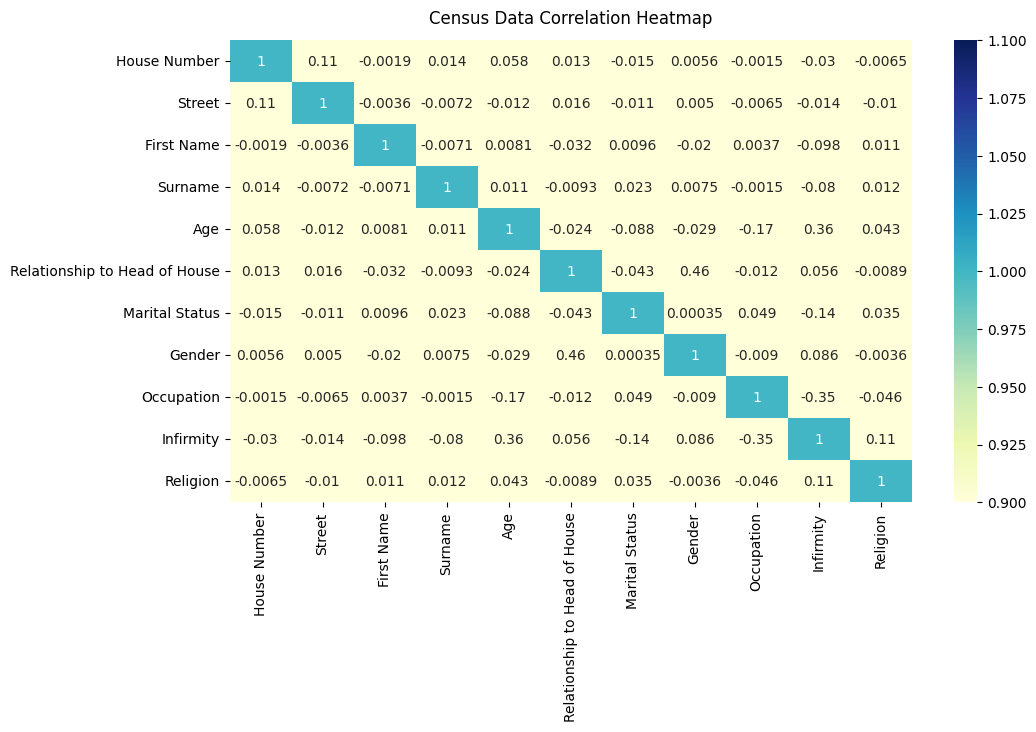

In [67]:
plt.figure(figsize=(11, 6))
mat = sns.heatmap(mydf.corr(), vmin = 1, vmax = 1, annot = True, cmap = "YlGnBu")
mat.set_title("Census Data Correlation Heatmap", fontsize = 12, pad = 12);
plt.show()

### To have a view of the entire dataset to spot any correlation based on the above matrix (Shah, 2022);

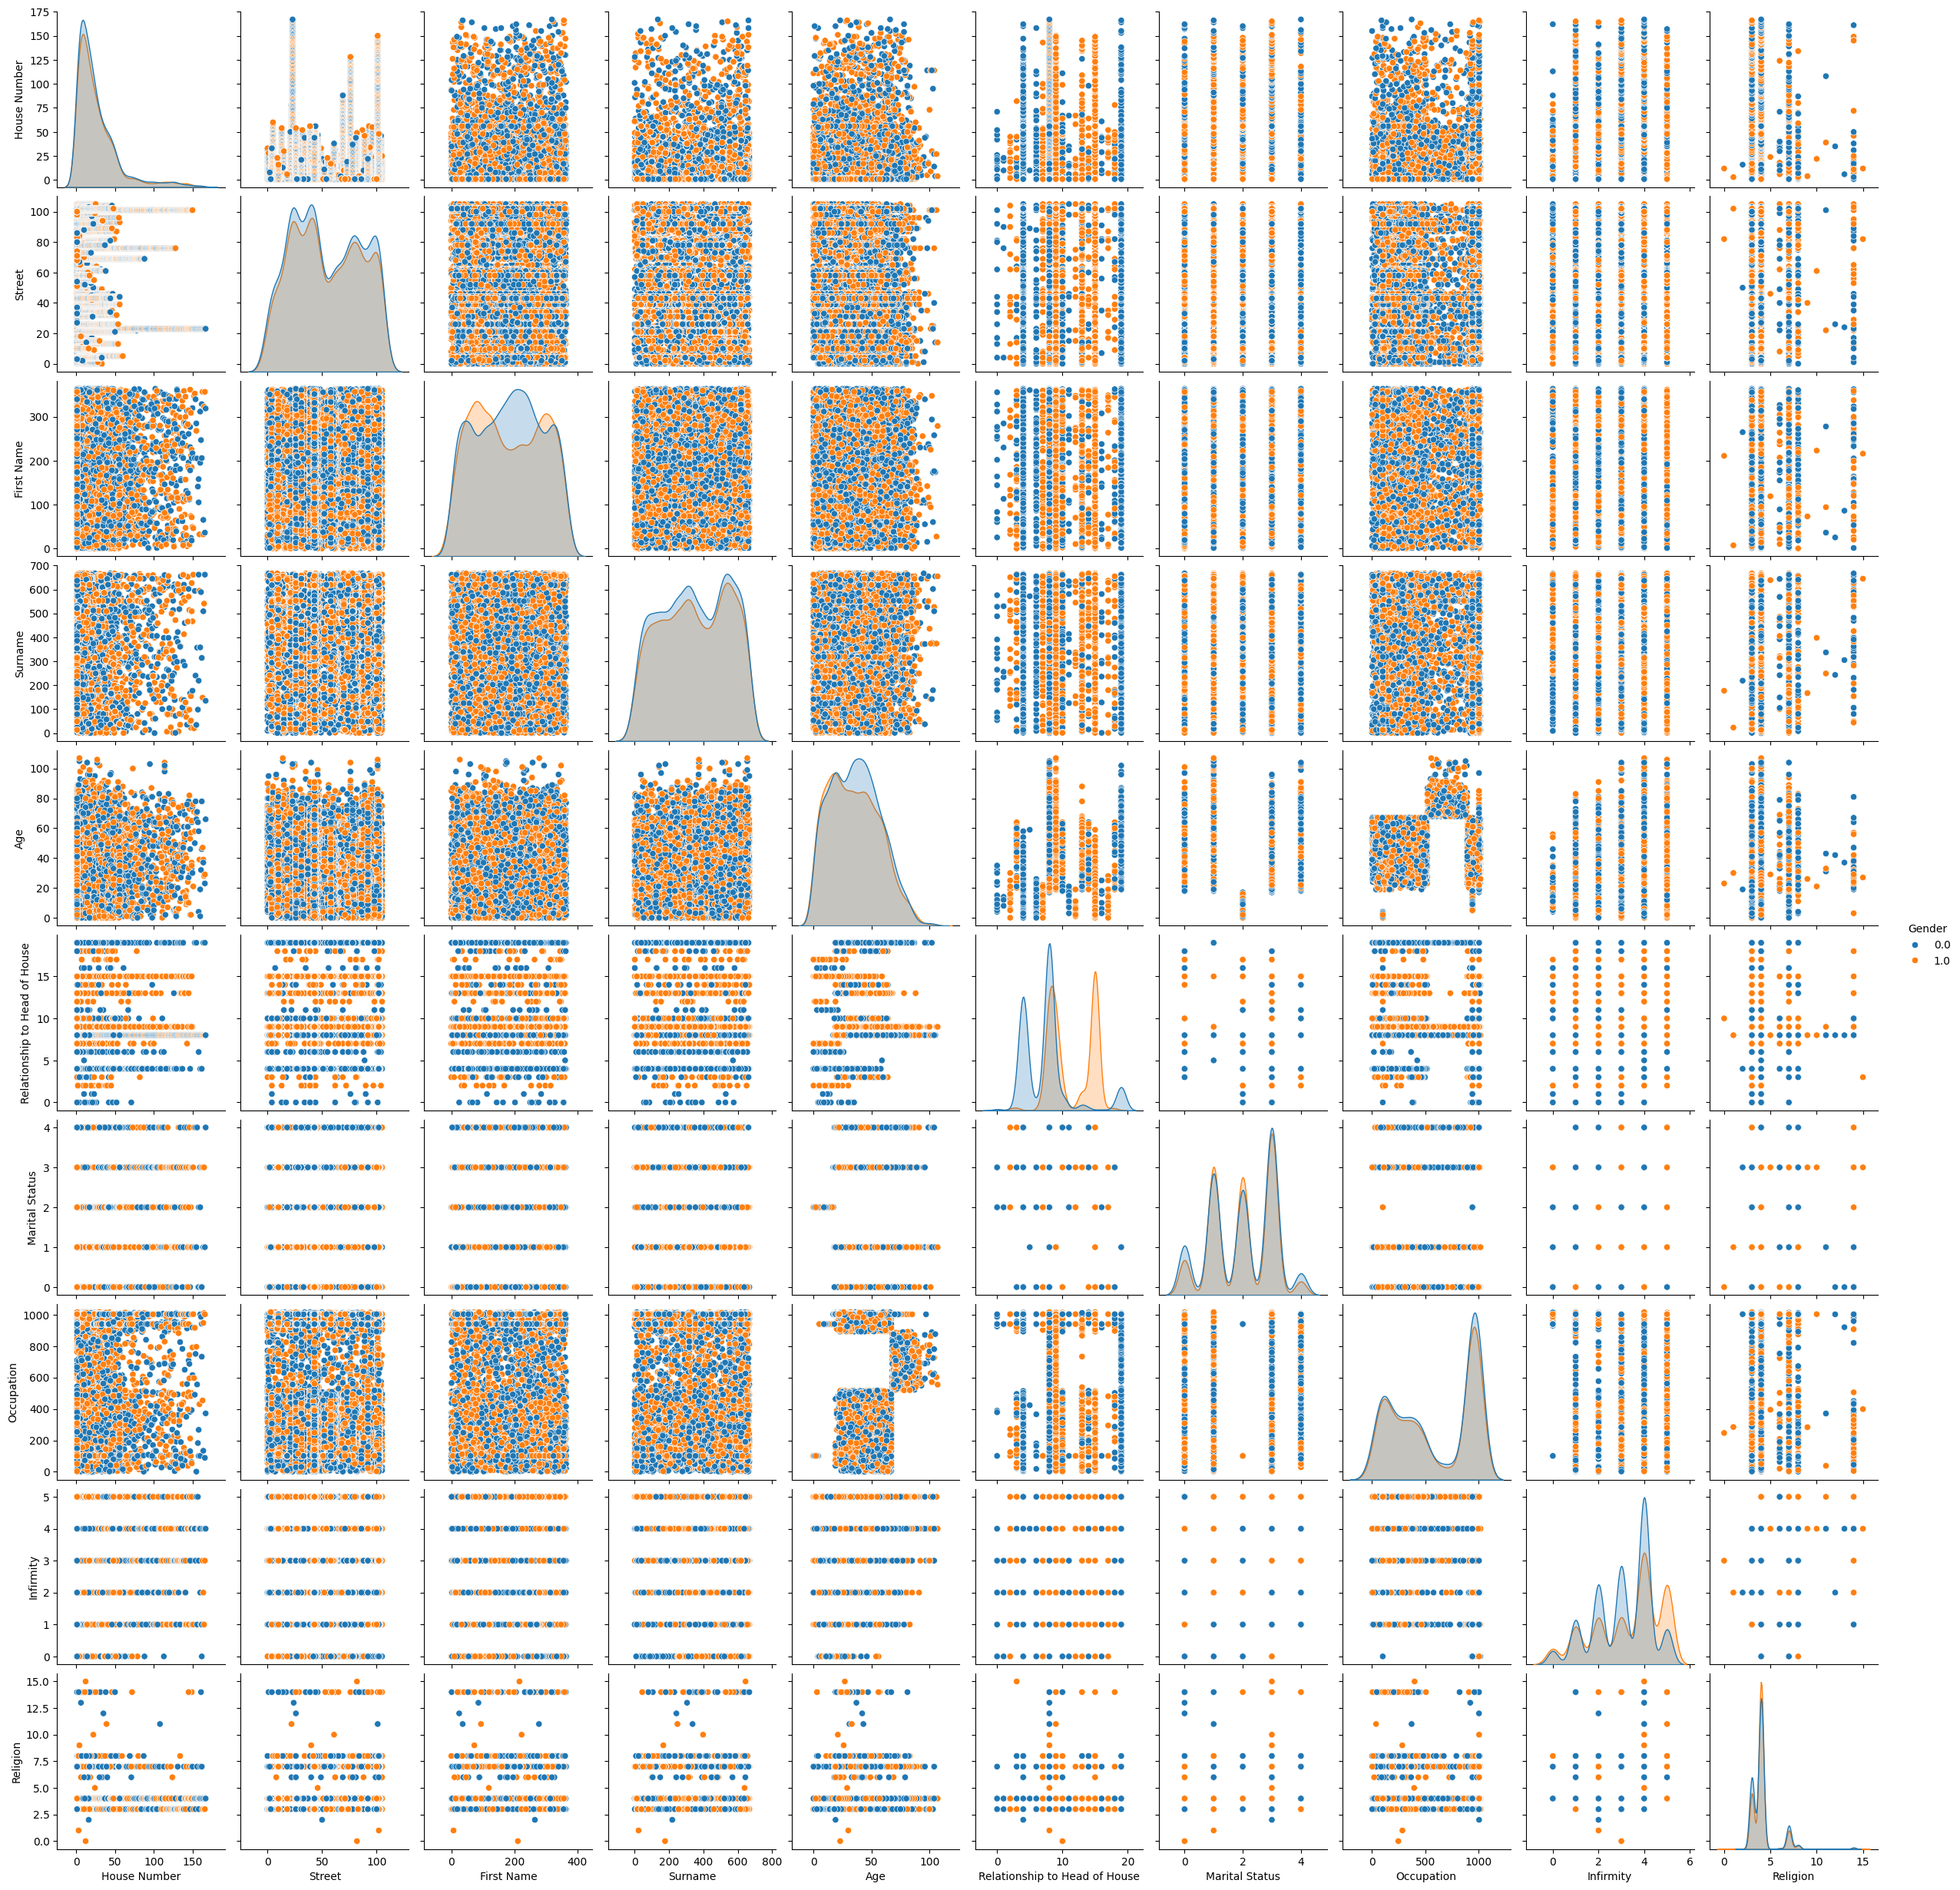

In [68]:
sns.pairplot(mydf, hue = "Gender");

### A look at the above shows that there was seemingly no significant correlation betwen any two variables

## Correlation of Infirmity and Occupation

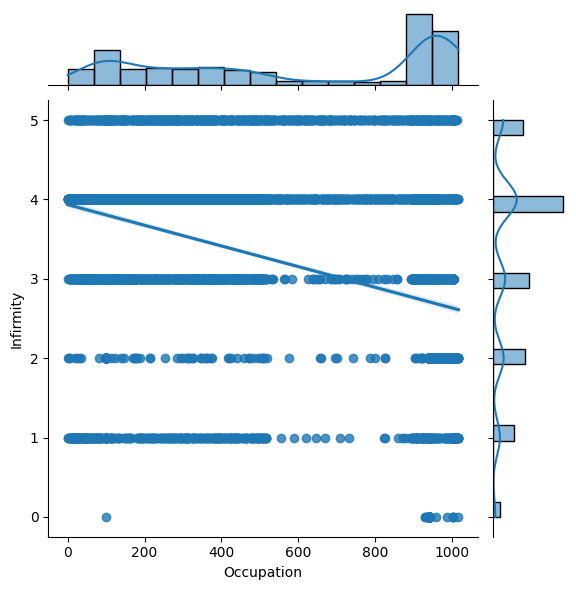

In [69]:
ax = sns.jointplot(data = mydf, x = "Occupation", y = "Infirmity", kind = "reg")

plt.show()

## Correlation of Infirmity and Age

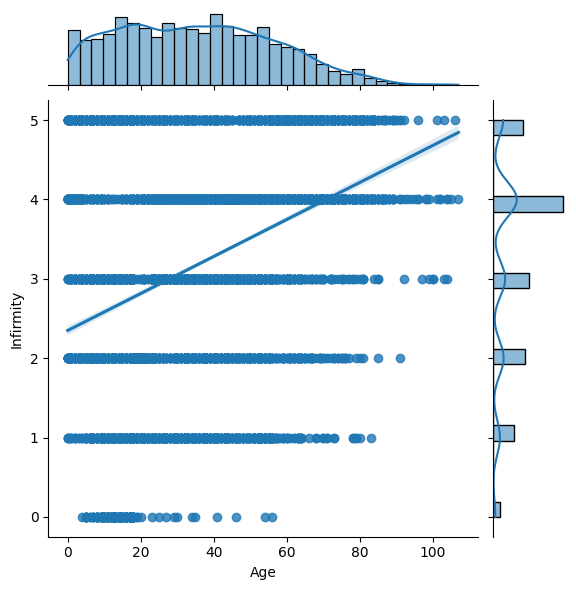

In [70]:
ax = sns.jointplot(data=mydf, x="Age", y="Infirmity", kind = "reg")

plt.show()

<Figure size 1200x1000 with 0 Axes>

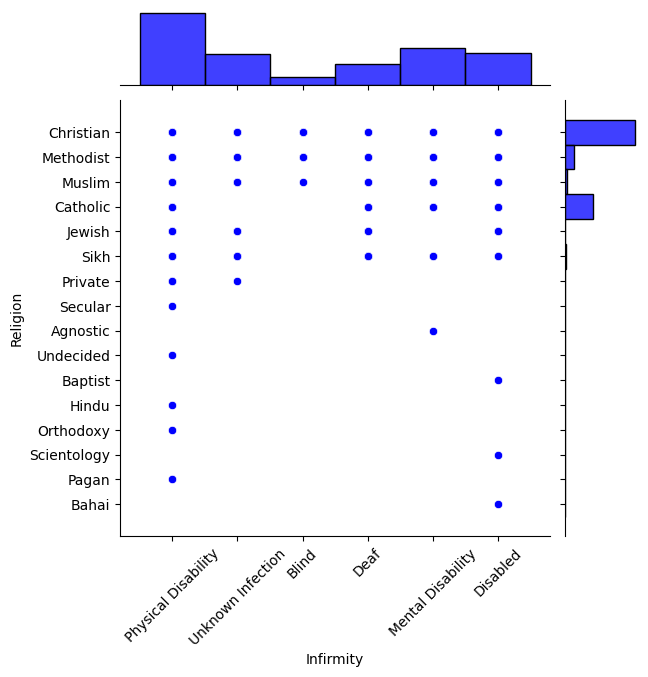

In [71]:
plt.figure(figsize = (12, 10))

ax = sns.jointplot(data=dfcopy, x="Infirmity", y="Religion", color = "blue")

plt.xticks(rotation = 45)

plt.show()

### The above heatmap shows that all correlations were leass than 40% and no column was worth dropping.

## 6. Control for high and unnecessary precision

#### Only the Age column has values with high and unnecessary precision

In [72]:
dfcopy["Age"] = np.floor(dfcopy["Age"]) # (Samal, 2022) (Banerjee, 2022)
dfcopy["Age"].unique()

array([ 61.,  62.,  21.,  44.,  28.,  49.,  51.,  19.,  17.,  36.,  38.,
         6.,   2.,  43.,  41.,  15.,  42.,   5.,   3.,  73.,  40.,  13.,
        11.,   7.,  64.,  39.,  34.,  48.,  45.,  14.,  12.,  50.,   9.,
        58.,  16.,  10.,  52.,  54.,  22.,  63.,  35.,  26.,  30.,  33.,
         1.,  25.,  18.,  46.,   8.,  37.,   4.,  29.,  47.,  53.,  31.,
        24.,   0.,  55.,  27.,  69.,  59.,  66.,  68.,  20.,  81.,  32.,
        60.,  23.,  57.,  56.,  75.,  65.,  71.,  67.,  83.,  76.,  77.,
        84.,  80.,  85.,  87.,  70.,  72.,  79.,  78.,  89.,  91.,  88.,
        92.,  74.,  82., 104.,  98.,  90.,  86.,  97.,  94.,  96.,  93.,
        99., 103., 102.,  95., 106., 100., 101., 105., 107.])

In [73]:
dfcopy["Age"] = np.floor(dfcopy["Age"])
dfcopy.head(10)

House Number          Street First Name     Surname   Age  \
0             1  Jones Crossing     Victor  Richardson  61.0   
1             1  Jones Crossing     Duncan       Clark  62.0   
2             1  Jones Crossing       Sian        Page  21.0   
3             1  Jones Crossing      Kevin       Jones  44.0   
4             1  Jones Crossing      Derek  Stephenson  28.0   
5             2  Jones Crossing      Wendy     Stevens  49.0   
6             2  Jones Crossing   Benjamin     Stevens  51.0   
7             2  Jones Crossing       Adam     Stevens  19.0   
8             2  Jones Crossing       Leon     Stevens  17.0   
9             3  Jones Crossing      Megan   Wilkinson  36.0   

  Relationship to Head of House Marital Status  Gender            Occupation  \
0                          Head         Single    Male                Lawyer   
1                       Partner         Single    Male       Energy engineer   
2                      Daughter         Single  Female    University Student   
3                          Head         Single    Male          Set designer   
4                           Son         Single    Male       Psychotherapist   
5                          Head        Married  Female   Administrator, arts   
6                       Husband        Married    Male  Engineer, production   
7                           Son       Divorced    Male    University Student   
8                           Son            N/A    Male               Student   
9                          Head        Married  Female          Tour manager   

             Infirmity   Religion  
0  Physical Disability  Christian  
1    Unknown Infection  Christian  
2  Physical Disability  Methodist  
3  Physical Disability  Methodist  
4  Physical Disability     Muslim  
5  Physical Disability  Christian  
6  Physical Disability  Christian  
7                Blind  Christian  
8                 Deaf  Christian  
9  Physical Disability     Muslim

## 7. Constant Fields

In [74]:
#To check for any columns with a single consistent value;
for col in dfcopy.columns:
    counts = dfcopy[col].value_counts()
    if len(counts) == 1:
        print("Column" + col + "is a constant value of" + str(counts.index[0]))

#### No column in the dataset is found to have a single constant or consistent value.

## 8. Investigate Field and Record Level Outliers

In [75]:
for col in dfcopy.columns:
    if col not in nom_col:
        print(col)

House Number
Age


#### The above output shows that House Number and Age are the only non categorical columns 

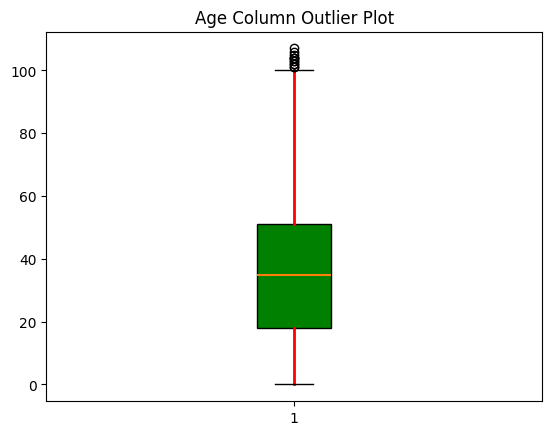

In [76]:
fig1, ax1 = plt.subplots()
outlier_col = "Age"
ax1.set_title("Age Column Outlier Plot")
ax1.boxplot(dfcopy[outlier_col], patch_artist = True, boxprops = dict(facecolor = "green"), 
            medianprops = dict(linewidth = 1.5), whiskerprops = dict(color = "red", linewidth = 2))

plt.show()

#### The above box plot shows that ages above 100 years were outliers. These are maintained because they considered valid. There was not need for record level oitliers investigation.

## Section II: Population Demographic Analysis

## 1. Age Population Structure

#### In order to get a better insight of the age distribution, I need to create 3 separate columns, including Age Group, Males and Females, following the model code  from a blog (Cloud, 2023);

In [77]:
def age_group(years):
    if years < 5:
        return "0 - 4"
    elif years < 10:
        return "5 - 9"
    elif years < 15:
        return "10 - 14"
    elif years < 20:
        return "15 - 19"
    elif years < 25:
        return "20 - 24"
    elif years < 30:
        return "25 - 29"
    elif years < 35:
        return "30 - 34"
    elif years < 40:
        return "35 - 39"
    elif years < 45:
        return "40 - 44"
    elif years < 50:
        return "45 - 49"
    elif years < 55:
        return "50 - 54"
    elif years < 60:
        return "55 - 59"
    elif years < 65:
        return "60 - 64"
    elif years < 70:
        return "65 - 69"
    elif years < 75:
        return "70 - 74"
    elif years < 80:
        return "75 - 79"
    elif years < 85:
        return "80 - 84"
    elif years < 90:
        return "85 - 89"
    elif years < 95:
        return "90 - 94"
    elif years < 100:
        return "95 - 99"
    else:
        return "100 +"

dfcopy["Age Group"] = dfcopy["Age"].apply(age_group)
dfcopy

House Number             Street First Name     Surname   Age  \
0                1     Jones Crossing     Victor  Richardson  61.0   
1                1     Jones Crossing     Duncan       Clark  62.0   
2                1     Jones Crossing       Sian        Page  21.0   
3                1     Jones Crossing      Kevin       Jones  44.0   
4                1     Jones Crossing      Derek  Stephenson  28.0   
...            ...                ...        ...         ...   ...   
8232             1  Oyster Obervatory   Benjamin     Andrews  24.0   
8233             1  Oyster Obervatory       Luke     Andrews  24.0   
8234             1  Oyster Obervatory     Marion     Andrews  22.0   
8235             1  Oyster Obervatory       Kyle     Andrews  22.0   
8236             1  Oyster Obervatory      Nigel     Andrews   2.0   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single    Male   
1                          Partner         Single    Male   
2                         Daughter         Single  Female   
3                             Head         Single    Male   
4                              Son         Single    Male   
...                            ...            ...     ...   
8232                           Son         Single    Male   
8233                           Son       Divorced    Male   
8234                      Daughter         Single  Female   
8235                           Son         Single    Male   
8236                           Son            N/A    Male   

                 Occupation            Infirmity   Religion Age Group  
0                    Lawyer  Physical Disability  Christian   60 - 64  
1           Energy engineer    Unknown Infection  Christian   60 - 64  
2        University Student  Physical Disability  Methodist   20 - 24  
3              Set designer  Physical Disability  Methodist   40 - 44  
4           Psychotherapist  Physical Disability     Muslim   25 - 29  
...                     ...                  ...        ...       ...  
8232  Clinical embryologist    Unknown Infection  Christian   20 - 24  
8233          IT consultant                 Deaf  Christian   20 - 24  
8234     University Student                 Deaf  Christian   20 - 24  
8235     University Student    Unknown Infection  Christian   20 - 24  
8236                  Child    Unknown Infection  Christian     0 - 4  

[8237 rows x 12 columns]

#### After creating the age groups, the female and male counts for each age group were generated using the groupby() and transform() functions (Sharma, 2023)

In [78]:
dfcopy["Female_age"] = dfcopy.loc[dfcopy["Gender"] == "Female", "Age"]
dfcopy["Females"] = dfcopy.groupby(["Age Group"])["Female_age"].transform("count")

dfcopy["Male_age"] = dfcopy.loc[dfcopy["Gender"] == "Male", "Age"]
dfcopy["Males"] = dfcopy.groupby(["Age Group"])["Male_age"].transform("count")

In [79]:
dfcopy

House Number             Street First Name     Surname   Age  \
0                1     Jones Crossing     Victor  Richardson  61.0   
1                1     Jones Crossing     Duncan       Clark  62.0   
2                1     Jones Crossing       Sian        Page  21.0   
3                1     Jones Crossing      Kevin       Jones  44.0   
4                1     Jones Crossing      Derek  Stephenson  28.0   
...            ...                ...        ...         ...   ...   
8232             1  Oyster Obervatory   Benjamin     Andrews  24.0   
8233             1  Oyster Obervatory       Luke     Andrews  24.0   
8234             1  Oyster Obervatory     Marion     Andrews  22.0   
8235             1  Oyster Obervatory       Kyle     Andrews  22.0   
8236             1  Oyster Obervatory      Nigel     Andrews   2.0   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single    Male   
1                          Partner         Single    Male   
2                         Daughter         Single  Female   
3                             Head         Single    Male   
4                              Son         Single    Male   
...                            ...            ...     ...   
8232                           Son         Single    Male   
8233                           Son       Divorced    Male   
8234                      Daughter         Single  Female   
8235                           Son         Single    Male   
8236                           Son            N/A    Male   

                 Occupation            Infirmity   Religion Age Group  \
0                    Lawyer  Physical Disability  Christian   60 - 64   
1           Energy engineer    Unknown Infection  Christian   60 - 64   
2        University Student  Physical Disability  Methodist   20 - 24   
3              Set designer  Physical Disability  Methodist   40 - 44   
4           Psychotherapist  Physical Disability     Muslim   25 - 29   
...                     ...                  ...        ...       ...   
8232  Clinical embryologist    Unknown Infection  Christian   20 - 24   
8233          IT consultant                 Deaf  Christian   20 - 24   
8234     University Student                 Deaf  Christian   20 - 24   
8235     University Student    Unknown Infection  Christian   20 - 24   
8236                  Child    Unknown Infection  Christian     0 - 4   

      Female_age  Females  Male_age  Males  
0            NaN      213      61.0    221  
1            NaN      213      62.0    221  
2           21.0      306       NaN    303  
3            NaN      356      44.0    301  
4            NaN      275      28.0    277  
...          ...      ...       ...    ...  
8232         NaN      306      24.0    303  
8233         NaN      306      24.0    303  
8234        22.0      306       NaN    303  
8235         NaN      306      22.0    303  
8236         NaN      237       2.0    257  

[8237 rows x 16 columns]

In [80]:
dfcopy.drop(columns = ["Female_age", "Male_age"], inplace = True)

In [81]:
dfcopy

House Number             Street First Name     Surname   Age  \
0                1     Jones Crossing     Victor  Richardson  61.0   
1                1     Jones Crossing     Duncan       Clark  62.0   
2                1     Jones Crossing       Sian        Page  21.0   
3                1     Jones Crossing      Kevin       Jones  44.0   
4                1     Jones Crossing      Derek  Stephenson  28.0   
...            ...                ...        ...         ...   ...   
8232             1  Oyster Obervatory   Benjamin     Andrews  24.0   
8233             1  Oyster Obervatory       Luke     Andrews  24.0   
8234             1  Oyster Obervatory     Marion     Andrews  22.0   
8235             1  Oyster Obervatory       Kyle     Andrews  22.0   
8236             1  Oyster Obervatory      Nigel     Andrews   2.0   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single    Male   
1                          Partner         Single    Male   
2                         Daughter         Single  Female   
3                             Head         Single    Male   
4                              Son         Single    Male   
...                            ...            ...     ...   
8232                           Son         Single    Male   
8233                           Son       Divorced    Male   
8234                      Daughter         Single  Female   
8235                           Son         Single    Male   
8236                           Son            N/A    Male   

                 Occupation            Infirmity   Religion Age Group  \
0                    Lawyer  Physical Disability  Christian   60 - 64   
1           Energy engineer    Unknown Infection  Christian   60 - 64   
2        University Student  Physical Disability  Methodist   20 - 24   
3              Set designer  Physical Disability  Methodist   40 - 44   
4           Psychotherapist  Physical Disability     Muslim   25 - 29   
...                     ...                  ...        ...       ...   
8232  Clinical embryologist    Unknown Infection  Christian   20 - 24   
8233          IT consultant                 Deaf  Christian   20 - 24   
8234     University Student                 Deaf  Christian   20 - 24   
8235     University Student    Unknown Infection  Christian   20 - 24   
8236                  Child    Unknown Infection  Christian     0 - 4   

      Females  Males  
0         213    221  
1         213    221  
2         306    303  
3         356    301  
4         275    277  
...       ...    ...  
8232      306    303  
8233      306    303  
8234      306    303  
8235      306    303  
8236      237    257  

[8237 rows x 14 columns]

#### The generated male and female counts were then verified using the groupby().value_counts.to_frame() function (Zverkova, 2020)

In [82]:
dfcopy.groupby("Age Group")["Gender"].value_counts().to_frame()

count
Age Group Gender       
0 - 4     Male      257
          Female    237
10 - 14   Male      311
          Female    269
100 +     Female      7
          Male        7
15 - 19   Female    351
          Male      339
20 - 24   Female    306
          Male      303
25 - 29   Male      277
          Female    275
30 - 34   Female    350
          Male      305
35 - 39   Female    359
          Male      264
40 - 44   Female    356
          Male      301
45 - 49   Female    334
          Male      278
5 - 9     Female    270
          Male      262
50 - 54   Female    305
          Male      233
55 - 59   Male      241
          Female    230
60 - 64   Male      221
          Female    213
65 - 69   Female    153
          Male      114
70 - 74   Female    107
          Male       92
75 - 79   Female     77
          Male       57
80 - 84   Male       56
          Female     54
85 - 89   Male       25
          Female     20
90 - 94   Male       10
          Female      2
95 - 99   Female      7
          Male        2

#### There was a need for the age pyramid and in order to do that, Age Group values were sorted using the sort_values(by=) function (Ozanich, 2022)

In [83]:
sortdf = dfcopy.sort_values(by = "Age", ascending = False)
# pandas.DataFrame.sort_values("Age Group")
sortdf.tail()

House Number              Street First Name    Surname  Age  \
116             31      Jones Crossing      Harry     Norton  0.0   
5426             7    Drummer Motorway     Stuart      Payne  0.0   
974             47  Richardson Estates      Lewis     Palmer  0.0   
184              2          Windy Dale    Bradley      Quinn  0.0   
1124           111  Richardson Estates     Steven  Gallagher  0.0   

     Relationship to Head of House Marital Status Gender Occupation  \
116                            Son            N/A   Male      Child   
5426                      Step-Son            N/A   Male      Child   
974                            Son            N/A   Male      Child   
184                    Adopted Son            N/A   Male      Child   
1124                           Son            N/A   Male      Child   

                Infirmity   Religion Age Group  Females  Males  
116   Physical Disability  Christian     0 - 4      237    257  
5426  Physical Disability   Catholic     0 - 4      237    257  
974   Physical Disability  Christian     0 - 4      237    257  
184   Physical Disability  Christian     0 - 4      237    257  
1124                 Deaf  Christian     0 - 4      237    257

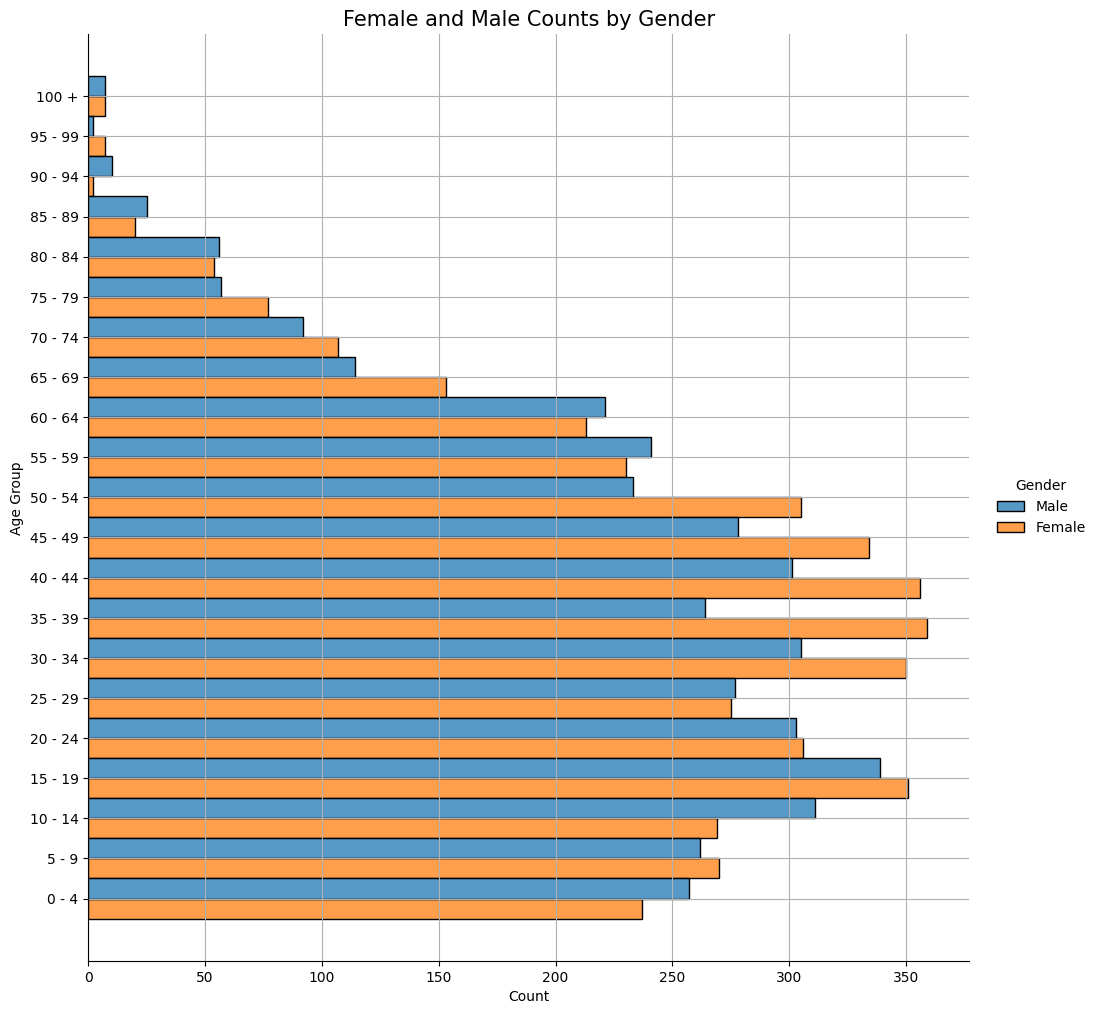

In [84]:
sns.displot(sortdf, y = "Age Group", hue = "Gender", multiple = "dodge", height = 10) # (Waskom, 2024)
plt.title("Female and Male Counts by Gender", fontsize = 15)
plt.grid()

#### The above diagram showed that two age brackets failed to comply with the sorting function. I then proceeded by using the value counts dataframe to generate a separate dataframe for the age pyramid following a blog model (Stat Writer, 2023).

In [85]:
dfcopy.groupby("Age Group")["Gender"].value_counts().to_frame()

count
Age Group Gender       
0 - 4     Male      257
          Female    237
10 - 14   Male      311
          Female    269
100 +     Female      7
          Male        7
15 - 19   Female    351
          Male      339
20 - 24   Female    306
          Male      303
25 - 29   Male      277
          Female    275
30 - 34   Female    350
          Male      305
35 - 39   Female    359
          Male      264
40 - 44   Female    356
          Male      301
45 - 49   Female    334
          Male      278
5 - 9     Female    270
          Male      262
50 - 54   Female    305
          Male      233
55 - 59   Male      241
          Female    230
60 - 64   Male      221
          Female    213
65 - 69   Female    153
          Male      114
70 - 74   Female    107
          Male       92
75 - 79   Female     77
          Male       57
80 - 84   Male       56
          Female     54
85 - 89   Male       25
          Female     20
90 - 94   Male       10
          Female      2
95 - 99   Female      7
          Male        2

#### The above frame was then used to create a new dataframe to assist with the ploting of a population pyramid as seen below

In [86]:
pop_pyra = pd.DataFrame({"Age": ["100+", "95-99", "90-94", "85-89", "80-84", "75-79", "70-74", "65-69", "60-64", "55-59", "50-54", "45-49", "40-44", "35-39", "30-34", "25-29", "20-24", "15-19", "10-14", "5-9", "0-4"], 
                         "Females": [-7, -7, -2, -20, -54, -77, -107, -153, -213, -230, -305, -334, -356, -359, -350, -275, -306, -351, -269, -270, -237],
                         "Males": [7, 2, 10, 25, 56, 57, 92, 114, 221, 241, 233, 278, 301, 264, 305, 277, 303, 339, 311, 262, 257]})

AgeClass = ["100+", "95-99", "90-94", "85-89", "80-84", "75-79", "70-74", "65-69", "60-64", "55-59", "50-54", "45-49", "40-44", "35-39", "30-34", "25-29", "20-24", "15-19", "10-14", "5-9", "0-4"]

Text(0.5, 1.0, 'Age Pyramid')

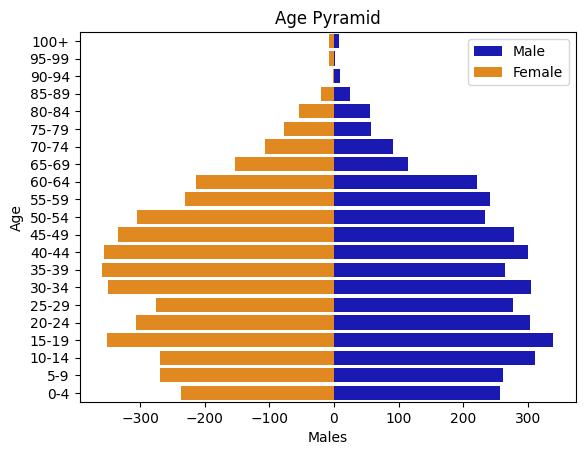

In [87]:
age_pyramid = sns.barplot(x = "Males", y = "Age", data = pop_pyra, order = AgeClass, color = ("mediumblue"), label = "Male")
age_pyramid = sns.barplot(x = "Females", y = "Age", data = pop_pyra, order = AgeClass, color = ("darkorange"), label = "Female")

age_pyramid.legend()
plt.title("Age Pyramid")

### The population pyramid can also be plotted using matplotlib.pyplot as seen below

In [88]:
pop_df = pd.DataFrame({"Age Bracket": ["0 - 4", "5 - 9", "10 - 14", "15 - 19", "20 - 24", "25 - 29", "30 - 34", "35 - 39",
                                        "40 - 44", "45 - 49", "50 - 54", "55 - 59", "60 - 64", "65 - 69", "70 - 74", "75 - 79",
                                        "80 - 84", "85 - 89", "90 - 94", "95 - 99", "100 +"],
                        "Females": [-237, -270, -269, -351, -306, -275, -350, -359, -356, -334, -305, -230, -213, -153, -107, -77, -54, -20, -2, -7, -7],
                        "Males": [257, 262, 311, 339, 303, 277, 305, 264, 301, 278, 233, 241, 221, 114, 92, 57, 56, 25, 10, 2, 7]})

pop_df

Age Bracket  Females  Males
0        0 - 4     -237    257
1        5 - 9     -270    262
2      10 - 14     -269    311
3      15 - 19     -351    339
4      20 - 24     -306    303
5      25 - 29     -275    277
6      30 - 34     -350    305
7      35 - 39     -359    264
8      40 - 44     -356    301
9      45 - 49     -334    278
10     50 - 54     -305    233
11     55 - 59     -230    241
12     60 - 64     -213    221
13     65 - 69     -153    114
14     70 - 74     -107     92
15     75 - 79      -77     57
16     80 - 84      -54     56
17     85 - 89      -20     25
18     90 - 94       -2     10
19     95 - 99       -7      2
20       100 +       -7      7

#### The above female and male counts were compared with the previous groupby() output and the below value_counts() output

In [89]:
dfcopy["Age Group"].value_counts()

Age Group
15 - 19    690
40 - 44    657
30 - 34    655
35 - 39    623
45 - 49    612
20 - 24    609
10 - 14    580
25 - 29    552
50 - 54    538
5 - 9      532
0 - 4      494
55 - 59    471
60 - 64    434
65 - 69    267
70 - 74    199
75 - 79    134
80 - 84    110
85 - 89     45
100 +       14
90 - 94     12
95 - 99      9
Name: count, dtype: int64

#### The above data confirmed that the female and male counts were correct. I then sort to plot the population pyramide to get a better picture of the age distribution.

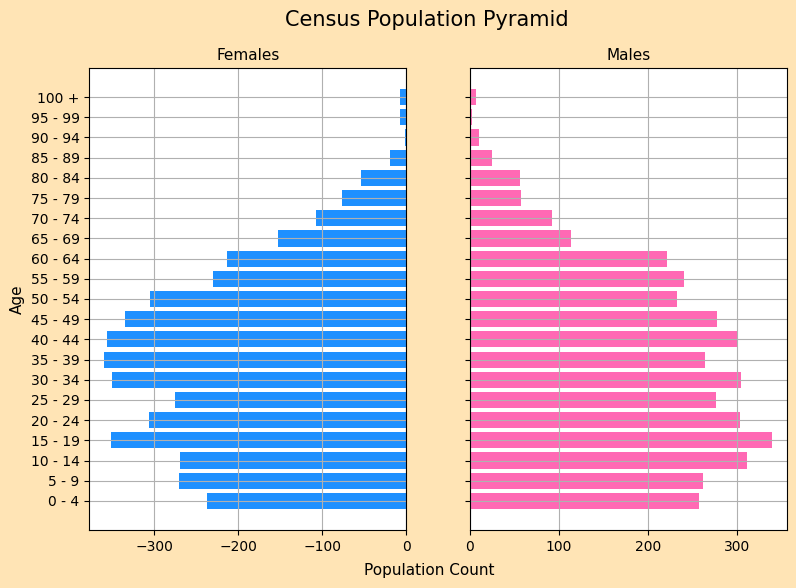

In [90]:
x1 = pop_df["Females"] #To define the first part of the x-axis limits and turing the bars from west to east
x2 = pop_df["Males"] #To define the second part of the x-axis limits
y = range(0, len(pop_df))

fig, plot = plt.subplots(ncols = 2, sharey = True, figsize = (9, 6)) #To set the parameters
fig.patch.set_facecolor("moccasin") #To define the color
plt.figtext(.5,.95, "Census Population Pyramid", fontsize = 15, ha = "center") #To set the pyramid title parameters
plt.figtext(.43, .035, "Population Count", fontsize = 11)

plot[0].barh(y, x1, align ='center', color = "dodgerblue") #To define the parameters of the female bars
plot[0].set_title("Females", fontsize = 11) #To assign title of female bars
plot[0].set_ylabel("Age", fontsize = 11) #To label the y-axis
plot[1].barh(y, x2, align = "center", color = "hotpink") #To define the parameters of the male bars
plot[1].set_title("Males", fontsize = 11) #To dfine the title of male bars

plot[0].set(yticks = y, yticklabels = pop_df["Age Bracket"]) #To define how the y-axis will be gradutaed and labeled
plot[0].grid() #To assign grid line to the females x-axis
plot[1].grid() #To assign grid lines to the males x-axis

plt.show() #To print graph

## 2. Population Birth Rate

In [91]:
dfcopy.loc[(dfcopy["Age"] == 0)] # These are the number of live births

House Number             Street First Name          Surname  Age  \
116             31     Jones Crossing      Harry           Norton  0.0   
184              2         Windy Dale    Bradley            Quinn  0.0   
373             21      Taylor Radial    Patrick         Robinson  0.0   
389             24      Taylor Radial       Dawn             Rose  0.0   
422              9        The Squares       Mark     Wilkins-Reid  0.0   
...            ...                ...        ...              ...  ...   
8034             7  Metropolis Street       Rita           Thomas  0.0   
8116            17      Marshall Pass       Anne  Vaughan-Watkins  0.0   
8177             1  Pendragon Granary    Russell     Watts-Tucker  0.0   
8178             1  Pendragon Granary       June          Bentley  0.0   
8179             1  Pendragon Granary      Leigh            Moore  0.0   

     Relationship to Head of House Marital Status  Gender Occupation  \
116                            Son            N/A    Male      Child   
184                    Adopted Son            N/A    Male      Child   
373                            Son            N/A    Male      Child   
389                       Daughter            N/A  Female      Child   
422                            Son            N/A    Male      Child   
...                            ...            ...     ...        ...   
8034                      Daughter            N/A  Female      Child   
8116                      Daughter            N/A  Female      Child   
8177                      Grandson            N/A    Male      Child   
8178                 Granddaughter            N/A  Female      Child   
8179                      Grandson            N/A    Male      Child   

                Infirmity   Religion Age Group  Females  Males  
116   Physical Disability  Christian     0 - 4      237    257  
184   Physical Disability  Christian     0 - 4      237    257  
373   Physical Disability  Christian     0 - 4      237    257  
389   Physical Disability  Christian     0 - 4      237    257  
422   Physical Disability  Christian     0 - 4      237    257  
...                   ...        ...       ...      ...    ...  
8034  Physical Disability   Catholic     0 - 4      237    257  
8116  Physical Disability  Methodist     0 - 4      237    257  
8177  Physical Disability   Catholic     0 - 4      237    257  
8178             Disabled  Christian     0 - 4      237    257  
8179  Physical Disability   Catholic     0 - 4      237    257  

[86 rows x 14 columns]

In [92]:
live_births = dfcopy[(dfcopy["Age"] == 0)] #(Tulchinsky et al, 2023)
len(live_births)

86

In [93]:
# 39 female and 47 male births with a 1.2:1 male: female ratio

crude_br = (len(live_births)/len(dfcopy)) * 100000
print("The Crude Birth Rate (CBR) is:", + round(crude_br),"per 100,000")

The Crude Birth Rate (CBR) is: 1044 per 100,000


In [94]:
#From the above code, there are 86 new borns aged 0

fem_births = dfcopy[(dfcopy["Age"] == 0) & (dfcopy["Gender"] == "Female")]
len(fem_births)

39

## 3. Fertility Rate

In [95]:
birth_age = dfcopy[(dfcopy["Gender"] == "Female") & (dfcopy["Age"] > 14) & (dfcopy["Age"] < 46)]

len(birth_age)

2072

In [96]:
# The above code passed shows that there are 2072 women of child-bearing age (15-45) in the town #(Tulchinsky et al, 2023)

fert_rate = (len(live_births)/len(birth_age)) * 100000
print("The Fertility Rate is:", + round(fert_rate, 1), "per 100,000")

The Fertility Rate is: 4150.6 per 100,000


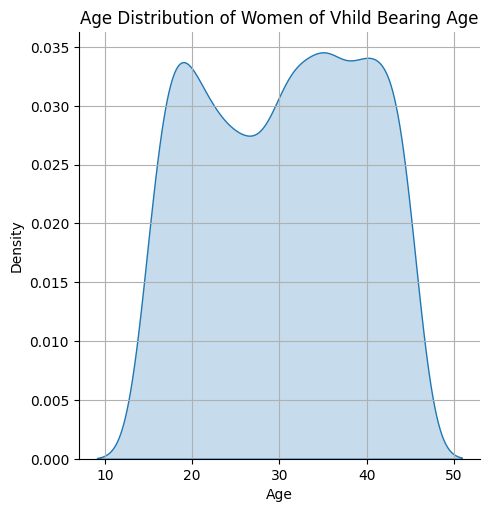

In [97]:
#To check if the population of women of child bearing age is nomally distributed.

sns.displot(birth_age, x="Age", kind="kde", fill=True)

plt.grid()
plt.title("Age Distribution of Women of Vhild Bearing Age")
plt.show()

In [98]:
#Based on the above non normal distribution, the non parametric equivalence of the mean (median) was computed.

median_cba = dfcopy.loc[(dfcopy["Gender"] == "Female") & (dfcopy["Age"] > 14) & (dfcopy["Age"] < 46), "Age"].median()

print("The median child bearing age is:", round(median_cba), "years")

The median child bearing age is: 31 years


## 4. Death Rate and Natural Increase

In [99]:
# The average crude death rate of the UK from 2011 to 2020 was 9.17 deaths per 1000 (Clark, 2024)

crude_dr = 917 #i.e. per 100,000
nat_increase = crude_br - crude_dr
print("The Natural Increase is:", + round(nat_increase), "per 100,000")

The Natural Increase is: 127 per 100,000


In [100]:
#dfcopy.loc[(dfcopy["Relationship to Head of House"].isnull()), "Age"].min()

In [101]:
# dfcopy.loc[(dfcopy["Relationship to Head of House"] == "Head") & (dfcopy["Age"] < 18)]
# dfcopy.loc[(dfcopy["House Number"] == 28) & (dfcopy["Street"] == "Windy Dale")]
# dfcopy.loc[(dfcopy["Age"] < 18) & (dfcopy["Marital Status"] == "Married")]
# dfcopy["Relationship to Head of House"].value_counts().to_frame()

## 5. Net Migration

In [102]:
#Rural population increase in the UK for the period running from 2011 t0 2020 was 6.0% or 6000 per 100,000 (Hall et al., 2024)
pop_growth = 6000
net_mig = pop_growth - nat_increase

print("The Net Migration Rate is:", + round(net_mig),"per 100,000")

The Net Migration Rate is: 5873 per 100,000


## 6. Population Growth Rate

In [103]:
pgr = (((nat_increase + net_mig)/100000) * 100)

print("The Pop Growth Rate is:", + pgr, "%")

The Pop Growth Rate is: 6.0 %


## Age and Marital Status

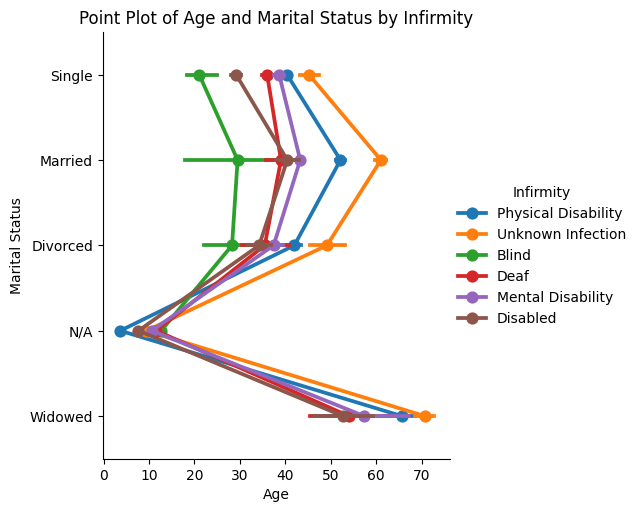

In [104]:
sns.catplot(dfcopy, x = "Age", y = "Marital Status", hue = "Infirmity", kind = "point") #(Grassia, 2020)

plt.title("Point Plot of Age and Marital Status by Infirmity")

plt.show()

## Marital Status and Relationship to Head of House

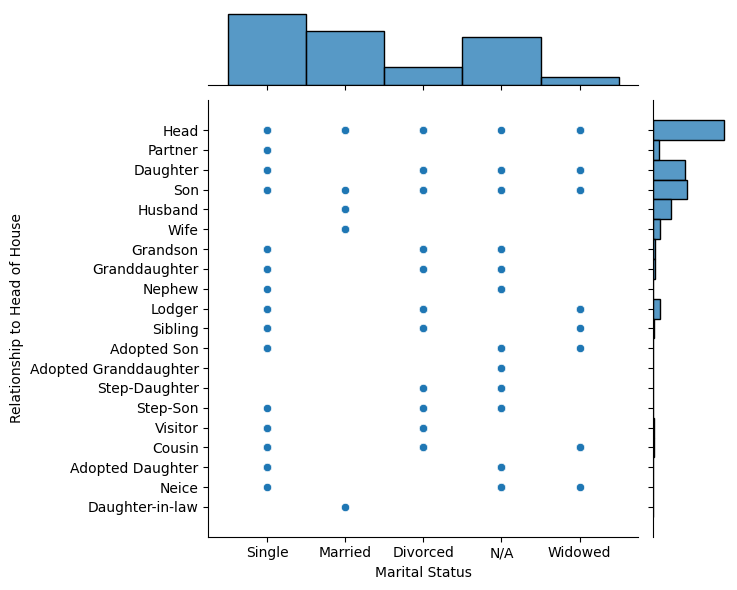

In [105]:
ax = sns.jointplot(data=dfcopy, x="Marital Status", y="Relationship to Head of House")

plt.show()

## Marital Status and Gender

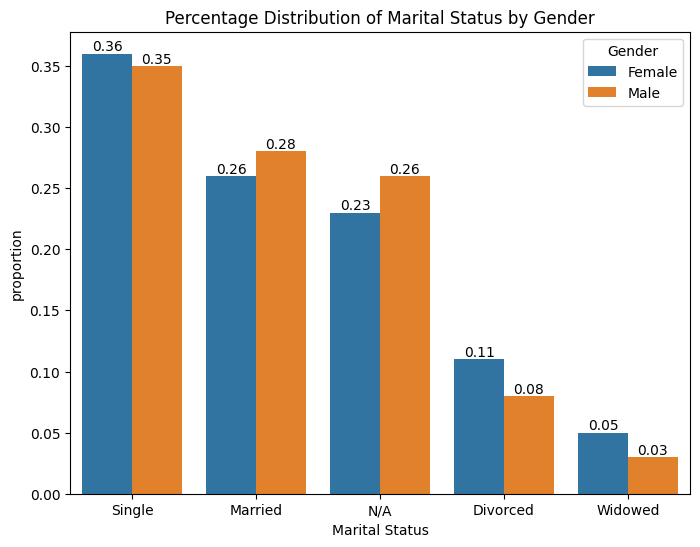

In [106]:
plt.figure(figsize = (8, 6))
x, y, hue = "Marital Status", "proportion", "Gender"
hue_order = ["Males", "Females"]

ax = (dfcopy[x].groupby(dfcopy[hue]).value_counts(normalize=True).round(2).rename(y).reset_index().pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
ax.set_title("Percentage Distribution of Marital Status by Gender", fontsize = 12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

## Marital Status and Infirmity

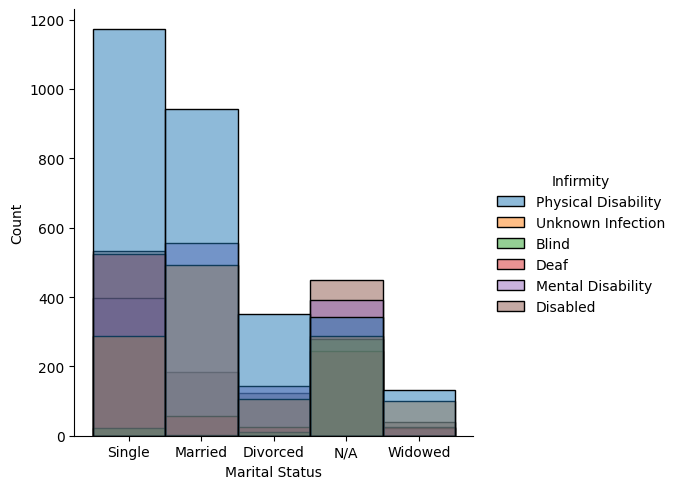

In [107]:
sns.displot(dfcopy, x = "Marital Status", hue = "Infirmity")

plt.show()

In [108]:
dfcopy.loc[(dfcopy["Marital Status"] == "Single") & (dfcopy["Infirmity"] == "Deaf")].value_counts().sum()
dfcopy.loc[(dfcopy["Marital Status"] == "Single") & (dfcopy["Infirmity"] == "Physical Disability")].value_counts().sum()

1172

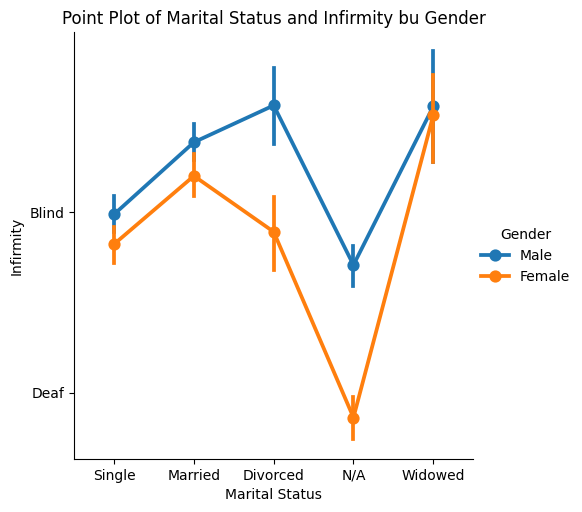

In [109]:
sns.catplot(data = dfcopy, x="Marital Status", y = "Infirmity", hue="Gender", kind="point")

plt.title("Point Plot of Marital Status and Infirmity bu Gender")

plt.show()

## Gender and Marital Status

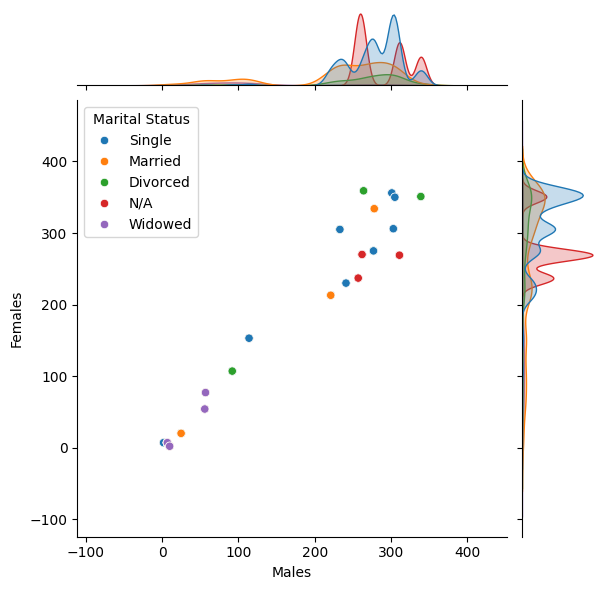

In [110]:
ax = sns.jointplot(data=dfcopy, x="Males", y="Females", hue = "Marital Status")

plt.show()

In [111]:
dfcopy.loc[(dfcopy["Marital Status"] == "Divorced") & (dfcopy["Gender"] == "Female")].value_counts().sum()
dfcopy.loc[(dfcopy["Marital Status"] == "Single") & (dfcopy["Gender"] == "Male")].value_counts().sum()
dfcopy.loc[(dfcopy["Marital Status"] == "Divorced") & (dfcopy["Gender"] == "Female")].value_counts().sum()
dfcopy.loc[(dfcopy["Marital Status"] == "Divorced") & (dfcopy["Gender"] == "Male")].value_counts().sum()

303

In [112]:
dfcopy.loc[(dfcopy["Infirmity"] == "Physical Disability") & (dfcopy["Gender"] == "Female")].value_counts().sum()
dfcopy.loc[(dfcopy["Infirmity"] == "Physical Disability") & (dfcopy["Gender"] == "Male")].value_counts().sum()

1306

## Gender and Infirmity

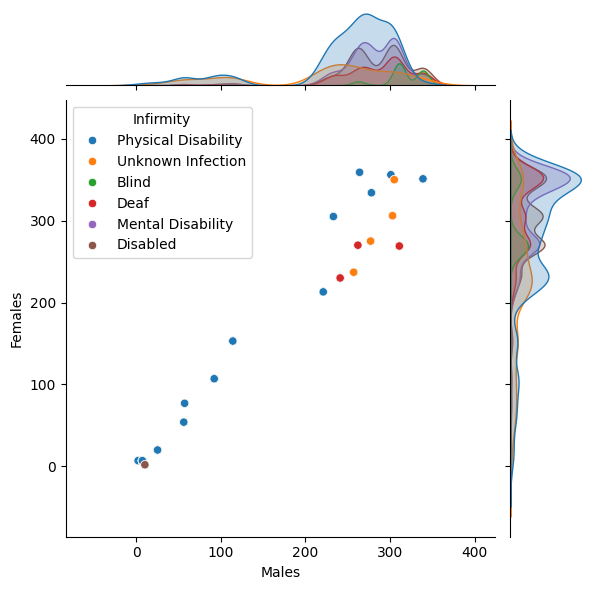

In [113]:
ax = sns.jointplot(data=dfcopy, x="Males", y="Females", hue = "Infirmity")

plt.show()

### Comparison of Infirmity and Population Age

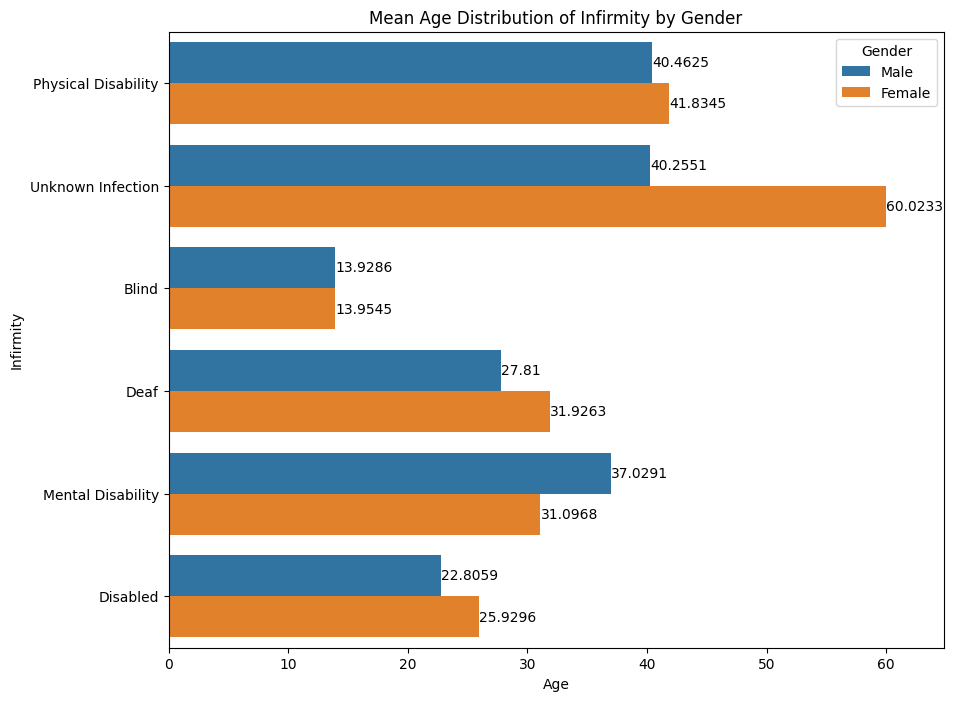

In [114]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(data = dfcopy, x="Age", hue = "Gender", y="Infirmity", err_kws = {"linewidth": "0"})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Mean Age Distribution of Infirmity by Gender")

plt.show()

## Distribution of Infirmity by Gender

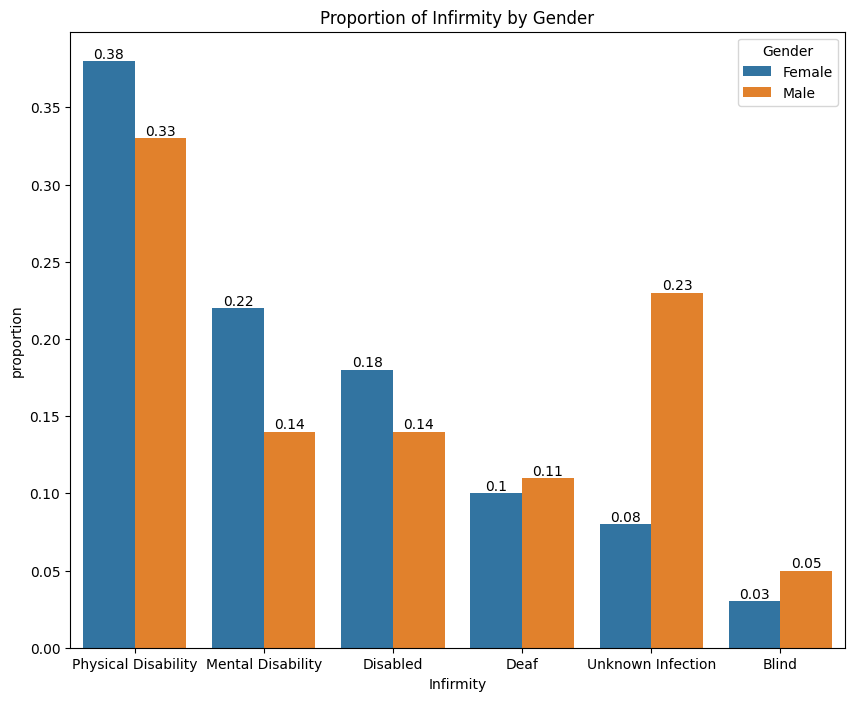

In [115]:
plt.figure(figsize = (10, 8))
x, y, hue = "Infirmity", "proportion", "Gender"
hue_order = ["Males", "Females"]

ax = (dfcopy[x].groupby(dfcopy[hue]).value_counts(normalize=True).rename(y).round(2).reset_index().pipe((sns.barplot, "data"), x=x, y=y, hue=hue)) #(Raonia, 2023)
ax.set_title("Proportion of Infirmity by Gender", fontsize = 12)

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

In [116]:
dfcopy.loc[(dfcopy["Gender"] == "Male")].value_counts().sum()

3955

In [117]:
dfcopy.loc[(dfcopy["Infirmity"] == "Disabled") & (dfcopy["Gender"] == "Male")].value_counts().sum()

546

In [118]:
dfcopy.loc[(dfcopy["Infirmity"] == "Disabled") & (dfcopy["Gender"] == "Female")].value_counts().sum()
#dfcopy.loc[(dfcopy["Infirmity"] == "Disabled") & (dfcopy["Gender"] == "Male")].value_counts().sum()

781

## Males and Females

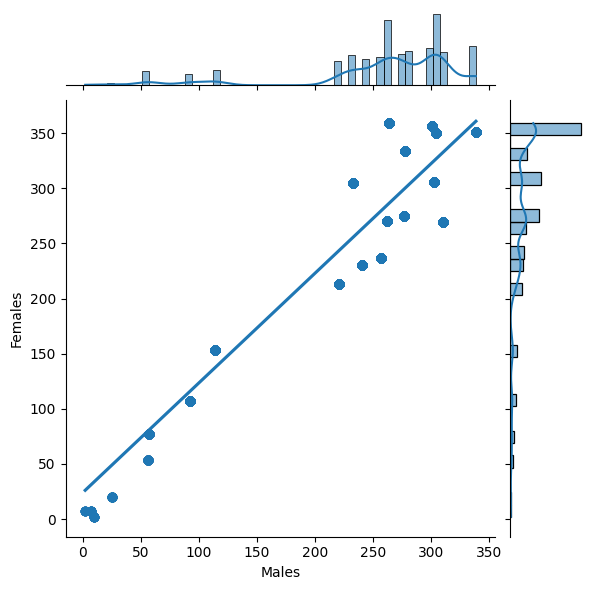

In [119]:
sns.jointplot(data=dfcopy, x="Males", y="Females", kind = "reg")

## Relationship to Head of House and Age

In [120]:
d1 = dfcopy["Relationship to Head of House"].value_counts()
d2 = len(dfcopy)
percent = round(d1/d2, 4) * 100
print(d1, + percent)

Relationship to Head of House
Head                     3162
Son                      1539
Daughter                 1445
Husband                   823
Lodger                    334
Wife                      293
Partner                   253
Grandson                   92
Granddaughter              85
Cousin                     48
Sibling                    41
Visitor                    33
Step-Son                   17
Adopted Son                15
Adopted Daughter           15
Nephew                     14
Neice                      13
Step-Daughter              11
Adopted Granddaughter       3
Daughter-in-law             1
Name: count, dtype: int64 Relationship to Head of House
Head                     38.39
Son                      18.68
Daughter                 17.54
Husband                   9.99
Lodger                    4.05
Wife                      3.56
Partner                   3.07
Grandson                  1.12
Granddaughter             1.03
Cousin                    0.58
Sibl

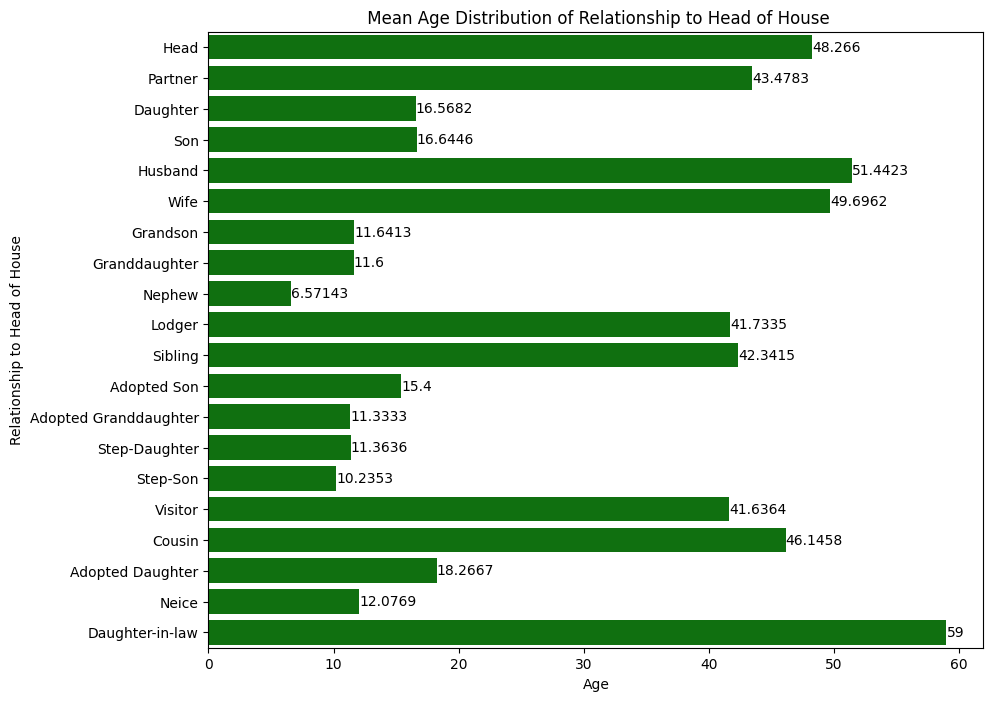

In [121]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(data = dfcopy, x="Age", y="Relationship to Head of House", color = "green", err_kws = {"linewidth": "0"})
ax.bar_label(ax.containers[0])
ax.set_title(" Mean Age Distribution of Relationship to Head of House")

plt.show()

In [122]:
dfcopy.loc[(dfcopy["Relationship to Head of House"] == "Head"), "Age"].mean()

48.26597090449083

## Religion and Marital Status

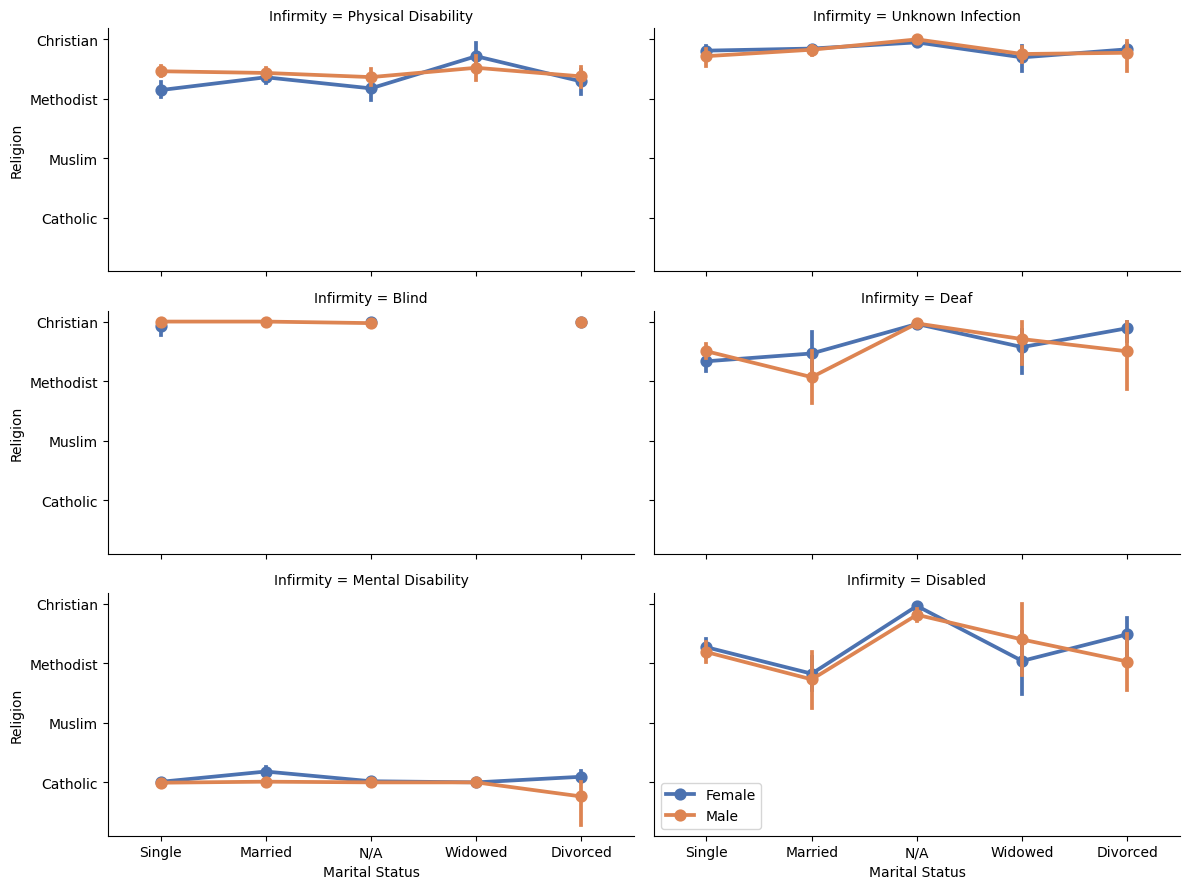

In [123]:
grid = sns.FacetGrid(dfcopy, col = "Infirmity", col_wrap = 2, aspect = 2)
grid.map(sns.pointplot, "Marital Status", "Religion", "Gender", palette = "deep")
plt.legend()

plt.show()

In [124]:
dfcopy.loc[(dfcopy["Marital Status"] == "Single") & 
(dfcopy["Infirmity"] =="Deaf") & 
(dfcopy["Religion"] == "Christian") & 
(dfcopy["Gender"] == "Female")].value_counts().sum()

208

In [125]:
dfcopy.loc[(dfcopy["Marital Status"] == "Single") & 
(dfcopy["Infirmity"] =="Deaf") & 
(dfcopy["Religion"] == "Christian") & 
(dfcopy["Gender"] == "Female"), "Age"].median()

38.0

In [126]:
dfcopy.loc[(dfcopy["Marital Status"] == "Single") & 
(dfcopy["Infirmity"] =="Deaf") & 
(dfcopy["Religion"] == "Christian") & 
(dfcopy["Gender"] == "Male")].value_counts().sum()

180

In [127]:
dfcopy.loc[(dfcopy["Marital Status"] == "Single") & 
(dfcopy["Infirmity"] =="Deaf") & 
(dfcopy["Religion"] == "Christian") & 
(dfcopy["Gender"] == "Male"), "Age"].median()

37.0

In [128]:
dfcopy.loc[(dfcopy["Marital Status"] == "Widowed") & 
(dfcopy["Infirmity"] =="Deaf") & 
(dfcopy["Religion"] == "Christian") & 
(dfcopy["Gender"] == "Female")].value_counts().sum()

14

In [129]:
dfcopy.loc[(dfcopy["Marital Status"] == "Widowed") & 
(dfcopy["Infirmity"] =="Deaf") & 
(dfcopy["Religion"] == "Christian") & 
(dfcopy["Gender"] == "Male")].value_counts().sum()

4

In [130]:
dfcopy.loc[(dfcopy["Marital Status"] == "Married") & 
(dfcopy["Infirmity"] =="Physical Disability") & 
(dfcopy["Religion"] == "Muslim") & 
(dfcopy["Gender"] == "Female")].value_counts().sum()

13

In [131]:
dfcopy.loc[(dfcopy["Marital Status"] == "Married") & 
(dfcopy["Infirmity"] =="Physical Disability") & 
(dfcopy["Religion"] == "Muslim") & 
(dfcopy["Gender"] == "Male")].value_counts().sum()

10

## Religion and Infirmity

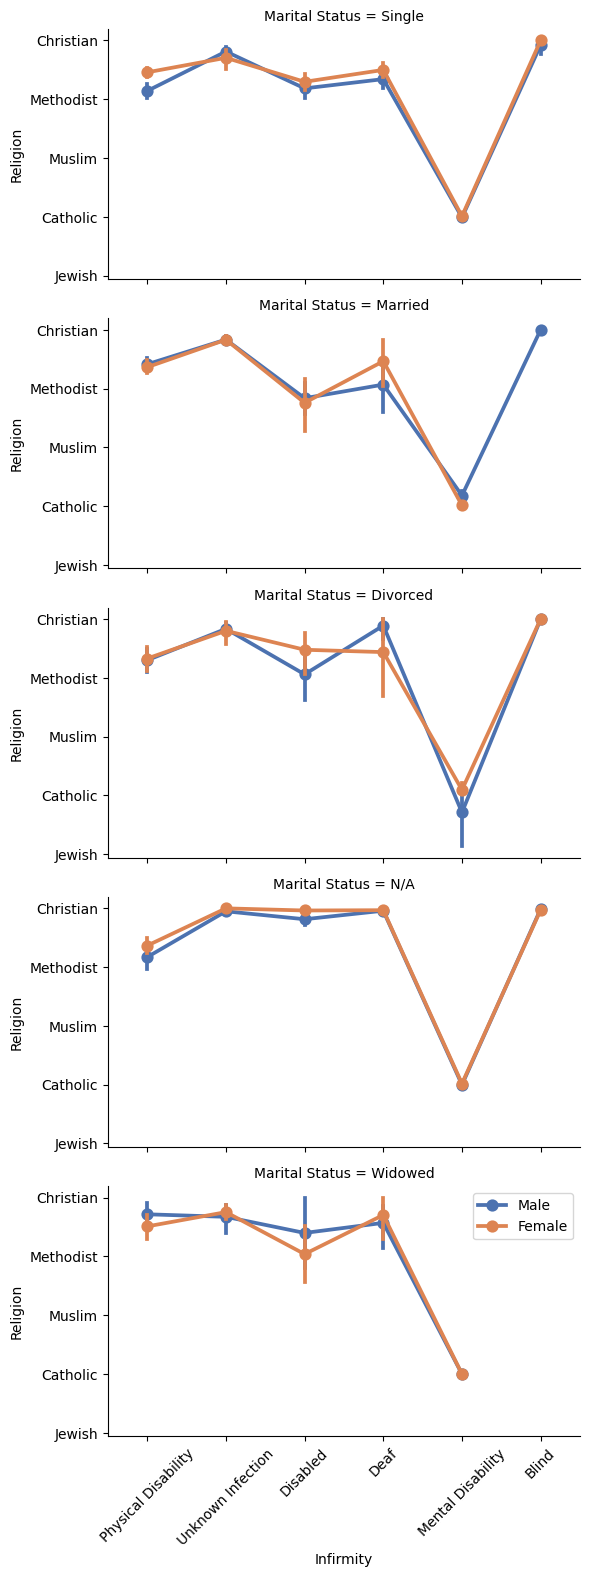

In [132]:
grid = sns.FacetGrid(dfcopy, row = "Marital Status", aspect = 2)
grid.map(sns.pointplot, "Infirmity", "Religion", "Gender", palette = "deep")

plt.xticks(rotation = 45)
plt.legend()

plt.show()

In [133]:
d3 = dfcopy["Infirmity"].value_counts()
d4 = len(dfcopy)
percentd2 = round(d3/d4, 4) * 100
print(d3, + percentd2)

Infirmity
Physical Disability    2937
Mental Disability      1511
Disabled               1327
Unknown Infection      1272
Deaf                    876
Blind                   314
Name: count, dtype: int64 Infirmity
Physical Disability    35.66
Mental Disability      18.34
Disabled               16.11
Unknown Infection      15.44
Deaf                   10.63
Blind                   3.81
Name: count, dtype: float64


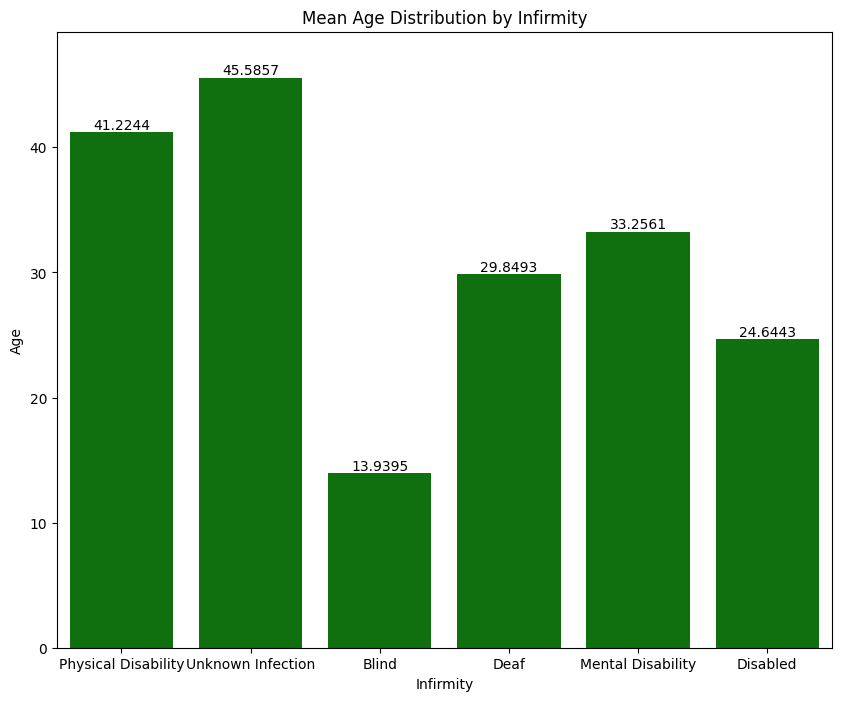

In [134]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(data = dfcopy, x="Infirmity", y="Age", color = "green", err_kws = {"linewidth": "0"})
ax.bar_label(ax.containers[0])
ax.set_title("Mean Age Distribution by Infirmity")

plt.show()

In [135]:
d5 = dfcopy["Religion"].value_counts()
d6 = len(dfcopy)
percentd3 = round(d5/d6, 4) * 100
print(d5, + percentd3)

Religion
Christian      5218
Catholic       2107
Methodist       697
Muslim          128
Sikh             48
Jewish           27
Private           3
Secular           1
Agnostic          1
Undecided         1
Baptist           1
Hindu             1
Orthodoxy         1
Scientology       1
Pagan             1
Bahai             1
Name: count, dtype: int64 Religion
Christian      63.35
Catholic       25.58
Methodist       8.46
Muslim          1.55
Sikh            0.58
Jewish          0.33
Private         0.04
Secular         0.01
Agnostic        0.01
Undecided       0.01
Baptist         0.01
Hindu           0.01
Orthodoxy       0.01
Scientology     0.01
Pagan           0.01
Bahai           0.01
Name: count, dtype: float64


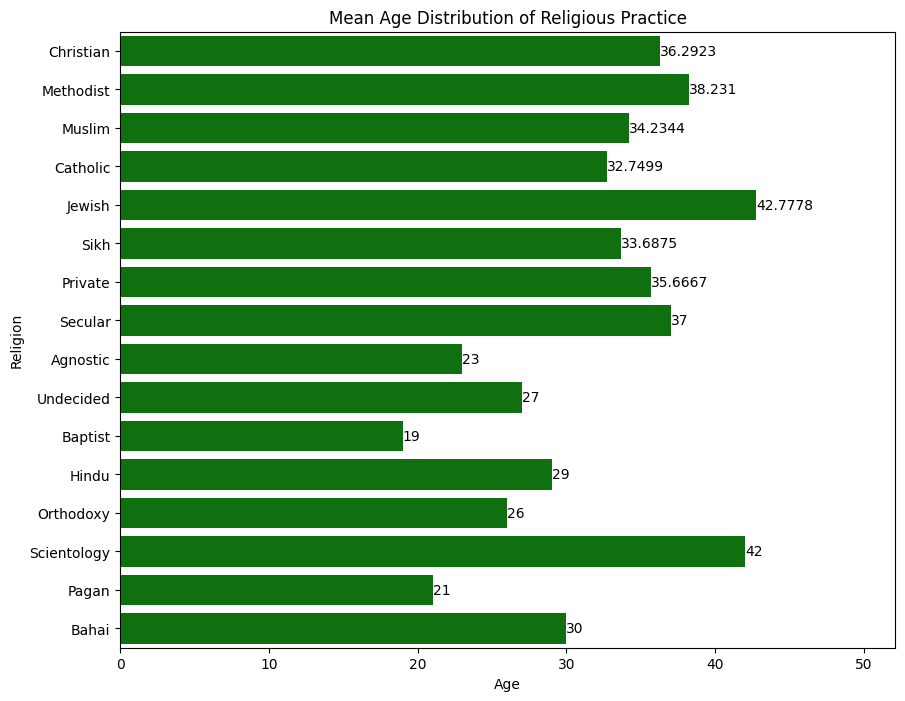

In [136]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(data = dfcopy, x="Age", y="Religion", color = "green", err_kws = {"linewidth": "0"})
ax.bar_label(ax.containers[0])
ax.set_title("Mean Age Distribution of Religious Practice")

plt.show()

## Household Occupancy

In [137]:
dfcopy.groupby("House Number")["Street"].value_counts().to_frame()

count
House Number Street                  
1            Pendragon Granary     14
             Smith Windmill        12
             Watson Castle         12
             Williams Folly        12
             Hazel Ford            11
...                               ...
163          Edwards Fall           1
164          Edwards Fall           2
165          Edwards Fall           1
166          Edwards Fall           2
167          Edwards Fall           1

[2824 rows x 1 columns]

#### There are 2,824 houses in the town

In [138]:
median_occup = len(dfcopy)/len(dfcopy.groupby("House Number")["Street"].value_counts().to_frame())

print("The Median House Occupancy is:", + round(median_occup))

The Median House Occupancy is: 3


## Education

In [139]:
dfcopy.head()

House Number          Street First Name     Surname   Age  \
0             1  Jones Crossing     Victor  Richardson  61.0   
1             1  Jones Crossing     Duncan       Clark  62.0   
2             1  Jones Crossing       Sian        Page  21.0   
3             1  Jones Crossing      Kevin       Jones  44.0   
4             1  Jones Crossing      Derek  Stephenson  28.0   

  Relationship to Head of House Marital Status  Gender          Occupation  \
0                          Head         Single    Male              Lawyer   
1                       Partner         Single    Male     Energy engineer   
2                      Daughter         Single  Female  University Student   
3                          Head         Single    Male        Set designer   
4                           Son         Single    Male     Psychotherapist   

             Infirmity   Religion Age Group  Females  Males  
0  Physical Disability  Christian   60 - 64      213    221  
1    Unknown Infection  Christian   60 - 64      213    221  
2  Physical Disability  Methodist   20 - 24      306    303  
3  Physical Disability  Methodist   40 - 44      356    301  
4  Physical Disability     Muslim   25 - 29      275    277

In [140]:
female_enrol = dfcopy.loc[(dfcopy["Occupation"] == "Student") & (dfcopy["Gender"] == "Female")]
len(female_enrol)

788

In [141]:
male_enrol = dfcopy.loc[(dfcopy["Occupation"] == "Student") & (dfcopy["Gender"] == "Male")]
len(male_enrol)

817

In [142]:
female_uni = dfcopy.loc[(dfcopy["Occupation"] == "University Student") & (dfcopy["Gender"] == "Female")]
len(female_uni)

265

In [143]:
male_uni = dfcopy.loc[(dfcopy["Occupation"] == "University Student") & (dfcopy["Gender"] == "Male")]
len(male_uni)

278

In [144]:
female_phd = dfcopy.loc[(dfcopy["Occupation"] == "PhD Student") & (dfcopy["Gender"] == "Female")]
len(female_phd)

3

In [145]:
male_phd = dfcopy.loc[(dfcopy["Occupation"] == "PhD Student") & (dfcopy["Gender"] == "Male")]
len(male_phd)

6

In [146]:
2157

2157

## Employment and Unemployment

In [147]:
dfcopy["Occupation"].str.startswith("Retired").value_counts()  #(Cloud, 2024)

Occupation
False    7653
True      584
Name: count, dtype: int64

In [148]:
dfcopy["Occupation"].str.startswith("Unemployed").value_counts() # To count all cells starting with word

Occupation
False    7725
True      512
Name: count, dtype: int64

In [149]:
dfcopy["Occupation"].str.startswith("University Student").value_counts() #To count all cells starting with word

Occupation
False    7694
True      543
Name: count, dtype: int64

In [150]:
dfcopy["Occupation"].str.startswith("Student").value_counts()

Occupation
False    6632
True     1605
Name: count, dtype: int64

In [151]:
dfcopy["Occupation"].str.startswith("PhD Student").value_counts()

Occupation
False    8228
True        9
Name: count, dtype: int64

In [152]:
dfcopy["Occupation"].str.startswith("Child").value_counts()

Occupation
False    7732
True      505
Name: count, dtype: int64

In [153]:
dfcopy["Occupation"].str.startswith(((((("Retired", 
                                         "Unemployed", 
                                         "Student", 
                                         "University Student", 
                                         "PhD Student", 
                                         "Child")))))).value_counts()

Occupation
False    4479
True     3758
Name: count, dtype: int64

In [154]:
work_pop = dfcopy.loc[(dfcopy["Age"] >= 16) & (dfcopy["Age"] <= 64)].value_counts().sum()
work_pop

5727

## Unemployment Rate

In [155]:
nowork_pop = dfcopy.loc[(dfcopy["Occupation"] == "Unemployed")].value_counts().sum()
nowork_pop

512

In [156]:
unemploy_rate = (nowork_pop/work_pop) * 100

print("The Unemployment Rate is:", round(unemploy_rate, 1),"%")

The Unemployment Rate is: 8.9 %


## Students commuting

In [157]:
dfcopy.loc[(dfcopy["Occupation"] == "University Student") + (dfcopy["Occupation"] == "PhD Student")].value_counts().sum()

552

In [158]:
import openpyxl
file_name = "dfcopy.xlsx"
dfcopy.to_excel(file_name)
print("Data is printed to Excel Successfully")

Data is printed to Excel Successfully


In [159]:
df_active = dfcopy.drop(dfcopy[(dfcopy["Occupation"].str.startswith(((((("Retired", 
                                         "Unemployed", 
                                         "Student", 
                                         "University Student", 
                                         "PhD Student", 
                                         "Child")))))))].index)

In [160]:
df_active

House Number             Street First Name     Surname   Age  \
0                1     Jones Crossing     Victor  Richardson  61.0   
1                1     Jones Crossing     Duncan       Clark  62.0   
3                1     Jones Crossing      Kevin       Jones  44.0   
4                1     Jones Crossing      Derek  Stephenson  28.0   
5                2     Jones Crossing      Wendy     Stevens  49.0   
...            ...                ...        ...         ...   ...   
8228             1    Scepter Factory      Naomi       Frost  23.0   
8230             1  Oyster Obervatory      Sally     Andrews  55.0   
8231             1  Oyster Obervatory      Louis   Griffiths  57.0   
8232             1  Oyster Obervatory   Benjamin     Andrews  24.0   
8233             1  Oyster Obervatory       Luke     Andrews  24.0   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single    Male   
1                          Partner         Single    Male   
3                             Head         Single    Male   
4                              Son         Single    Male   
5                             Head        Married  Female   
...                            ...            ...     ...   
8228                      Daughter         Single  Female   
8230                          Head         Single  Female   
8231                       Partner         Single    Male   
8232                           Son         Single    Male   
8233                           Son       Divorced    Male   

                          Occupation            Infirmity   Religion  \
0                             Lawyer  Physical Disability  Christian   
1                    Energy engineer    Unknown Infection  Christian   
3                       Set designer  Physical Disability  Methodist   
4                    Psychotherapist  Physical Disability     Muslim   
5                Administrator, arts  Physical Disability  Christian   
...                              ...                  ...        ...   
8228          Leisure centre manager                 Deaf  Christian   
8230  Dance movement psychotherapist  Physical Disability  Christian   
8231                       Homeopath                 Deaf  Christian   
8232           Clinical embryologist    Unknown Infection  Christian   
8233                   IT consultant                 Deaf  Christian   

     Age Group  Females  Males  
0      60 - 64      213    221  
1      60 - 64      213    221  
3      40 - 44      356    301  
4      25 - 29      275    277  
5      45 - 49      334    278  
...        ...      ...    ...  
8228   20 - 24      306    303  
8230   55 - 59      230    241  
8231   55 - 59      230    241  
8232   20 - 24      306    303  
8233   20 - 24      306    303  

[4479 rows x 14 columns]

In [161]:
dfcopy["Occupation"].str.startswith("Retired").value_counts()

Occupation
False    7653
True      584
Name: count, dtype: int64

# Regerences

### 1. Banerjee, P. (2023) NumPy floor(), Educba.com. Available at: https://www.educba.com/numpy-floor/ (Accessed: 3 April 2024).

### 2. Cloud, S. (2022) How to change column type in Pandas, Saturn Cloud. Available at: https://saturncloud.io/blog/pandas-tips-change-column-type/ (Accessed: 3 April 2024).

### 3. Cloud, S. (2023a) How to Create a New Column Based on the Value of Another Column in Pandas, Saturn Cloud. Available at: https://saturncloud.io/blog/how-to-create-a-new-column-based-on-the-value-of-another-column-in-pandas/ (Accessed: 31 March 2024).

### 4. Cloud, S. (2023b) How to Select Data from a Pandas Dataframe using Startswith, Saturn Cloud. Available at: https://saturncloud.io/blog/how-to-select-data-from-a-pandas-dataframe-using-startswith/ (Accessed: 11 May 2024).

### 5. Cloud, S. (2023c) How to Update a Pandas DataFrame Row with New Values, Saturn Cloud. Available at: https://saturncloud.io/blog/how-to-update-a-pandas-dataframe-row-with-new-values/ (Accessed: 31 March 2024).

### 6. Dash, S.K. (2022) Handling Missing Values with Random Forest, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/05/handling-missing-values-with-random-forest/ (Accessed: 7 May 2024).

### 7. Department of Education (2023) Summer born children starting school: advice for parents, UK government. Available at: https://www.gov.uk/government/publications/summer-born-children-school-admission/summer-born-children-starting-school-advice-for-parents (Accessed: 7 May 2024).

### 8. Grassia, M. (2020) Data visualization, Marco Grassia. Available at: https://marcograssia.com/courses/apl-python/visualization/resources/Visualization.pdf (Accessed: 12 May 2024).

### 9. Habibzadeh, F. and Habibzadeh, P. (2015) ‘How much precision in reporting statistics is enough?’, Croatian Medical Journal, 56(5), pp. 490–492. Available at: https://doi.org/10.3325/cmj.2015.56.490.

### 10. Hall, S. et al. (2024) Statistical Digest of Rural England: 1-Population. Available at: https://assets.publishing.service.gov.uk/media/661d3b95ac3dae9a53bd3dd3/16_04_2024_-_1_-_Population.pdf (Accessed: 10 May 2024).

### 11. Hanks, P., Hardcastle, K. and Hodges, F. (2006) A dictionary of first names. Oxford University Press. Available at: https://www.oxfordreference.com/display/10.1093/acref/9780198610601.001.0001/acref-9780198610601-e-6897?rskey=0bzEYO&result=1581 (Accessed: 7 April 2024).

### 12. Hopkins, S., Dettori, J.R. and Chapman, J.R. (2018) ‘Parametric and Nonparametric Tests in Spine Research: Why Do They Matter?’, Global spine journal, 8(6), pp. 652–654. Available at: https://doi.org/10.1177/2192568218782679.

### 13.Nayak, L. (2022) Dealing with missing data using python, Medium. Available at: https://medium.com/nerd-for-tech/dealing-with-missing-data-using-python-3fd785b77a05 (Accessed: 4 April 2024).

### 14. Ozanich, A. (2022) An Introduction to Pandas Dataframe Sorting, HubSpot Blog. Available at: https://blog.hubspot.com/website/pandas-sortby (Accessed: 6 April 2024).

### 15. Pinkins, K. (2023) Data Cleaning using Python’s Pandas, Medium. Available at: https://medium.com/@kpinkin1/data-cleaning-using-pythons-pandas-a5df4b36a561 (Accessed: 3 April 2024).

### 16. Prabhakaran, S. (no date) Missing Data Imputation Approaches | How to handle missing values in Python, Machine Learning Plus. Available at: https://www.machinelearningplus.com/machine-learning/missing-data-imputation-how-to-handle-missing-values-in-python/ (Accessed: 12 May 2024).

### 17. Raoniar, R. (2023) Introduction to Dodged Bar Plot — Matplotlib, Pandas and Seaborn Visualization Guide (Part 2.1), One Zero Blog. Available at: https://onezero.blog/introduction-to-dodged-bar-plot-matplotlib-pandas-and-seaborn-visualization-guide-part-2-1/ (Accessed: 10 May 2024).

### 18. Sainani, K.L. (2015) ‘Dealing With Missing Data’, PM and R, 7(9), pp. 990–994. Available at: https://doi.org/10.1016/j.pmrj.2015.07.011.

### 19. Shah, R. (2022) FacetGrid Based Methods for Exploratory Data Analysis, Analytics Vydhya. Available at: https://www.analyticsvidhya.com/blog/2021/07/using-seaborns-facetgrid-based-methods-for-exploratory-data-analysis/ (Accessed: 12 May 2024).

### 20. Sharma, P. (2023) Create column of value_counts in Pandas dataframe, Includehelp.com. Available at: https://www.includehelp.com/python/create-column-of-value_counts-in-pandas-dataframe.aspx (Accessed: 5 April 2024).

### 21. Stats Writer (2023) How To Create A Population Pyramid In Python?, psychology Scales. Available at: https://scales.arabpsychology.com/stats/how-to-create-a-population-pyramid-in-python/ (Accessed: 7 April 2024).

### 22. Tulchinsky, T.H., Varavikova, E.A. and Cohen, M.J. (2023) ‘Measuring, monitoring, and evaluating the health of a population’, in The New Public Health. Academic Press, pp. 125–214. Available at: https://doi.org/10.1016/b978-0-12-822957-6.00015-6.

### 23. Waskom, M. (2024) Visualizing distributions of data, Seaborn. Available at: https://seaborn.pydata.org/tutorial/distributions.html (Accessed: 5 April 2024).

### 24. Wikipedia (2024) Craig (given name) - Wikipedia, Wikipedia. Available at: https://en.wikipedia.org/wiki/Craig_(given_name) (Accessed: 7 April 2024).

### 25. Youth Justice Board (2022) Case management guidance - Definitions - Guidance, UK Government. Available at: https://www.gov.uk/guidance/case-management-guidance/definitions (Accessed: 7 May 2024).

### 26. Zverkova, A. (2020) 8 Python Pandas Value_counts() tricks that make your work more efficient. Available at: https://re-thought.com/pandas-value_counts/ (Accessed: 5 April 2024).